## Standard Imports

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
from datetime import datetime
import pickle
from collections import defaultdict
warnings.filterwarnings('ignore')
sns.set(style='white')
%autosave 180

Autosaving every 180 seconds


In [ ]:
import torch

In [ ]:
from datetime import date

## Project Imports

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
#from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
from sklearn import metrics
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.feature_selection import RFECV, RFE
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer
# import warnings filter

from statistics import median 
import seaborn as sns
import configparser
import os

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
from sklearn.feature_selection import RFECV


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler 
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers

## read various data files

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/bmed_8813/final_project/q2_synthetic_data_08-19-2020/release_08-19-2020/training/measurement.csv',sep=',')

In [ ]:
df.shape

(197498, 20)

In [ ]:
df.head()

,person_id,measurement_id,measurement_concept_id,measurement_date,measurement_datetime,measurement_time,measurement_type_concept_id,operator_concept_id,value_as_number,value_as_concept_id,unit_concept_id,range_low,range_high,provider_id,visit_occurrence_id,visit_detail_id,measurement_source_value,measurement_source_concept_id,unit_source_value,value_source_value
0,516,1,3000905,2015-11-14,2015-11-14 14:41:00,2018-07-14,44818702,4172703.0,4.90,NaN,8848.0,4.30,10.00,NaN,NaN,NaN,NaN,3000905,10*3/uL,4.90
1,1193,2,3028288,2013-01-24,2013-01-24 14:41:00,2015-12-28,44818702,4172703.0,57.00,NaN,NaN,NaN,130.00,NaN,NaN,NaN,NaN,3028288,NaN,57.00
2,949,3,3027114,2017-09-06,2017-09-06 14:41:00,2017-06-20,44818702,4172703.0,216.00,NaN,8840.0,NaN,200.00,NaN,NaN,NaN,NaN,3027114,mg/dL,216.00
3,1059,4,3012030,2018-12-23,2018-12-23 14:41:00,2019-02-26,44818702,4172703.0,32.50,NaN,NaN,27.30,33.60,NaN,NaN,NaN,NaN,3012030,pg,32.50
4,348,5,3016723,2012-10-26,2012-10-26 14:41:00,2019-03-01,44818702,4172703.0,0.93,NaN,8840.0,0.51,1.18,NaN,NaN,NaN,NaN,3016723,mg/dL,0.93


In [ ]:
df.isnull().sum()

person_id                             0
measurement_id                        0
measurement_concept_id                0
measurement_date                      0
measurement_datetime                  0
measurement_time                  16201
measurement_type_concept_id           0
operator_concept_id               16479
value_as_number                     831
value_as_concept_id              197220
unit_concept_id                   65069
range_low                         43616
range_high                        33154
provider_id                      197498
visit_occurrence_id              197498
visit_detail_id                  197498
measurement_source_value         197498
measurement_source_concept_id         0
unit_source_value                 38243
value_source_value                  831
dtype: int64

In [ ]:

df_n1 = df[['person_id', 'measurement_id', 'measurement_concept_id',
       'measurement_date', 'measurement_datetime',
       'value_as_number', 'unit_concept_id',
       'unit_source_value']].copy()

In [ ]:
df_n1.head()

,person_id,measurement_id,measurement_concept_id,measurement_date,measurement_datetime,value_as_number,unit_concept_id,unit_source_value
0,516,1,3000905,2015-11-14,2015-11-14 14:41:00,4.90,8848.0,10*3/uL
1,1193,2,3028288,2013-01-24,2013-01-24 14:41:00,57.00,NaN,NaN
2,949,3,3027114,2017-09-06,2017-09-06 14:41:00,216.00,8840.0,mg/dL
3,1059,4,3012030,2018-12-23,2018-12-23 14:41:00,32.50,NaN,pg
4,348,5,3016723,2012-10-26,2012-10-26 14:41:00,0.93,8840.0,mg/dL


In [ ]:
df_n1[df_n1.measurement_concept_id==706181]

,person_id,measurement_id,measurement_concept_id,measurement_date,measurement_datetime,value_as_number,unit_concept_id,unit_source_value
12790,80,98517,706181,2020-03-14,2020-03-14 14:41:00,NaN,NaN,NaN
13837,87,45594,706181,2011-08-23,2011-08-23 14:41:00,NaN,NaN,NaN
28157,177,122571,706181,2013-12-07,2013-12-07 14:41:00,NaN,NaN,NaN
32310,202,99079,706181,2012-01-03,2012-01-03 14:41:00,NaN,NaN,NaN
32714,205,133284,706181,2017-04-01,2017-04-01 14:41:00,NaN,NaN,NaN
53389,335,6927,706181,2019-08-19,2019-08-19 14:41:00,NaN,NaN,NaN
90280,570,187737,706181,2013-09-20,2013-09-20 14:41:00,NaN,NaN,NaN
95242,602,154501,706181,2011-11-07,2011-11-07 14:41:00,NaN,NaN,NaN
98652,623,21340,706181,2020-07-09,2020-07-09 14:41:00,NaN,NaN,NaN
116651,737,65283,706181,2015-03-30,2015-03-30 14:41:00,NaN,NaN,NaN


In [ ]:
df_n1[df_n1.measurement_concept_id==3042596]

,person_id,measurement_id,measurement_concept_id,measurement_date,measurement_datetime,value_as_number,unit_concept_id,unit_source_value
26555,166,117636,3042596,2013-05-23,2013-05-23 14:41:00,NaN,NaN,NaN
46132,287,90218,3042596,2012-04-22,2012-04-22 14:41:00,NaN,NaN,NaN
97764,617,121263,3042596,2019-12-09,2019-12-09 14:41:00,NaN,NaN,NaN
101564,641,182110,3042596,2013-10-03,2013-10-03 14:41:00,NaN,NaN,NaN
101728,642,124956,3042596,2010-06-07,2010-06-07 14:41:00,NaN,NaN,NaN
106379,671,96824,3042596,2016-07-04,2016-07-04 14:41:00,NaN,NaN,NaN
112219,708,175574,3042596,2019-08-15,2019-08-15 14:41:00,NaN,NaN,NaN
124790,792,117904,3042596,2017-10-02,2017-10-02 14:41:00,NaN,NaN,NaN
158851,1007,158435,3042596,2014-08-07,2014-08-07 14:41:00,NaN,NaN,NaN
170764,1082,152833,3042596,2016-08-21,2016-08-21 14:41:00,NaN,NaN,NaN


In [ ]:
df_n1[(df_n1.measurement_concept_id==3027018)&(df_n1.person_id==80)]

,person_id,measurement_id,measurement_concept_id,measurement_date,measurement_datetime,value_as_number,unit_concept_id,unit_source_value
12926,80,110575,3027018,2011-04-01,2011-04-01 14:41:00,73.0,8483.0,bpm


In [ ]:
df_n1[(df_n1.measurement_concept_id==3027018)&(df_n1.person_id==87)]

,person_id,measurement_id,measurement_concept_id,measurement_date,measurement_datetime,value_as_number,unit_concept_id,unit_source_value
13988,87,123530,3027018,2010-11-21,2010-11-21 14:41:00,86.0,8483.0,bpm
13989,87,184981,3027018,2019-04-05,2019-04-05 14:41:00,80.0,8483.0,bpm


In [ ]:
df4[df4.status==1].head(20)

,person_id,status
8,8,1.0
12,12,1.0
33,33,1.0
58,58,1.0
70,70,1.0
73,73,1.0
91,91,1.0
96,96,1.0
103,103,1.0
144,144,1.0


In [ ]:
## exploring

In [ ]:
df_n1[(df_n1.measurement_concept_id==3033575)&(df_n1.person_id==87)]

,person_id,measurement_id,measurement_concept_id,measurement_date,measurement_datetime,value_as_number,unit_concept_id,unit_source_value
89481,87,89482,3033575,2015-11-23,2015-11-23 14:41:00,0.25,8848.0,10*3/uL


In [ ]:
df_n1[(df_n1.measurement_concept_id==3033575)&(df_n1.person_id==0)]

,person_id,measurement_id,measurement_concept_id,measurement_date,measurement_datetime,value_as_number,unit_concept_id,unit_source_value
167603,0,167604,3033575,2018-11-23,2018-11-23 14:41:00,0.55,8848.0,10*3/uL


In [ ]:
df_n1[(df_n1.measurement_concept_id==3033575)&(df_n1.person_id==1)]

,person_id,measurement_id,measurement_concept_id,measurement_date,measurement_datetime,value_as_number,unit_concept_id,unit_source_value
109203,1,109204,3033575,2010-02-15,2010-02-15 14:41:00,0.68,8848.0,10*3/uL


In [ ]:
df_n1[(df_n1.measurement_concept_id==3033575)&(df_n1.person_id==2)]

,person_id,measurement_id,measurement_concept_id,measurement_date,measurement_datetime,value_as_number,unit_concept_id,unit_source_value
98768,2,98769,3033575,2012-04-30,2012-04-30 14:41:00,0.74,8848.0,10*3/uL
179070,2,179071,3033575,2010-11-19,2010-11-19 14:41:00,0.44,8848.0,10*3/uL


In [ ]:
df_n1[(df_n1.measurement_concept_id==3033575)&(df_n1.person_id==3)]

,person_id,measurement_id,measurement_concept_id,measurement_date,measurement_datetime,value_as_number,unit_concept_id,unit_source_value
64301,3,64302,3033575,2016-01-16,2016-01-16 14:41:00,1.01,NaN,NaN
121466,3,121467,3033575,2016-07-15,2016-07-15 14:41:00,0.31,8848.0,10*3/uL


In [ ]:
df_n1[(df_n1.measurement_concept_id==3033575)&(df_n1.person_id==4)]

,person_id,measurement_id,measurement_concept_id,measurement_date,measurement_datetime,value_as_number,unit_concept_id,unit_source_value
60947,4,60948,3033575,2018-10-02,2018-10-02 14:41:00,0.45,8848.0,10*3/uL
108020,4,108021,3033575,2016-07-10,2016-07-10 14:41:00,0.58,8848.0,10*3/uL


In [ ]:
df_n1[(df_n1.measurement_concept_id==3033575)&(df_n1.person_id==5)]

,person_id,measurement_id,measurement_concept_id,measurement_date,measurement_datetime,value_as_number,unit_concept_id,unit_source_value
36330,5,36331,3033575,2016-01-09,2016-01-09 14:41:00,0.39,8848.0,10*3/uL
120387,5,120388,3033575,2010-07-16,2010-07-16 14:41:00,0.66,8848.0,10*3/uL
140234,5,140235,3033575,2014-01-30,2014-01-30 14:41:00,0.27,8848.0,10*3/uL


In [ ]:
df_n1[(df_n1.measurement_concept_id==3033575)&(df_n1.person_id==8)]

,person_id,measurement_id,measurement_concept_id,measurement_date,measurement_datetime,value_as_number,unit_concept_id,unit_source_value
159469,8,159470,3033575,2018-02-13,2018-02-13 14:41:00,0.3,8848.0,10*3/uL


In [ ]:
df_n1[(df_n1.measurement_concept_id==3033575)&(df_n1.person_id==12)]

,person_id,measurement_id,measurement_concept_id,measurement_date,measurement_datetime,value_as_number,unit_concept_id,unit_source_value
108464,12,108465,3033575,2014-07-15,2014-07-15 14:41:00,0.10,8848.0,10*3/uL
138383,12,138384,3033575,2012-12-24,2012-12-24 14:41:00,0.03,8848.0,10*3/uL
165024,12,165025,3033575,2010-07-14,2010-07-14 14:41:00,0.36,NaN,NaN


In [ ]:
df_n1[(df_n1.measurement_concept_id==3033575)&(df_n1.person_id==33)]

,person_id,measurement_id,measurement_concept_id,measurement_date,measurement_datetime,value_as_number,unit_concept_id,unit_source_value
153082,33,153083,3033575,2012-05-25,2012-05-25 14:41:00,0.41,NaN,NaN


In [ ]:
df_n1[(df_n1.measurement_concept_id==3033575)&(df_n1.person_id==58)]

,person_id,measurement_id,measurement_concept_id,measurement_date,measurement_datetime,value_as_number,unit_concept_id,unit_source_value
33315,58,33316,3033575,2017-12-23,2017-12-23 14:41:00,0.69,8848.0,10*3/uL


In [ ]:
df_n1[(df_n1.measurement_concept_id==3033575)&(df_n1.person_id==70)]

,person_id,measurement_id,measurement_concept_id,measurement_date,measurement_datetime,value_as_number,unit_concept_id,unit_source_value


In [ ]:
df_n1[(df_n1.measurement_concept_id==3033575)&(df_n1.person_id==73)]

,person_id,measurement_id,measurement_concept_id,measurement_date,measurement_datetime,value_as_number,unit_concept_id,unit_source_value
47233,73,47234,3033575,2013-01-11,2013-01-11 14:41:00,0.05,NaN,NaN
140196,73,140197,3033575,2014-08-07,2014-08-07 14:41:00,0.25,8848.0,10*3/uL
146190,73,146191,3033575,2011-10-03,2011-10-03 14:41:00,0.14,8848.0,10*3/uL


In [ ]:
## person data

In [ ]:

dfp = pd.read_csv('/content/drive/MyDrive/bmed_8813/final_project/q2_synthetic_data_08-19-2020/release_08-19-2020/training/person.csv',sep=',')

In [ ]:
dfp.shape

(1251, 18)

In [ ]:
dfp.head()

,person_id,gender_concept_id,year_of_birth,month_of_birth,day_of_birth,birth_datetime,race_concept_id,ethnicity_concept_id,location_id,provider_id,care_site_id,person_source_value,gender_source_value,gender_source_concept_id,race_source_value,race_source_concept_id,ethnicity_source_value,ethnicity_source_concept_id
0,0,8532,1951,9,18,1951-09-18,8515,38003564,1811,NaN,NaN,NaN,F,0,NaN,10,NaN,29
1,1,8532,1934,8,15,1934-08-15,8552,38003563,7867,NaN,NaN,NaN,F,0,NaN,8,NaN,28
2,2,8507,1993,2,20,1993-02-20,8552,38003564,7807,NaN,NaN,NaN,M,0,NaN,26,NaN,19
3,3,8532,1974,8,7,1974-08-07,8527,38003564,3498,NaN,NaN,NaN,F,0,NaN,30,NaN,29
4,4,8532,1942,5,9,1942-05-09,8527,38003563,4350,NaN,NaN,NaN,F,0,NaN,30,NaN,28


In [ ]:
## unique person id list
pids = df_n1.person_id.unique().tolist()

In [ ]:
## data dictionary

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/bmed_8813/final_project/data_dictionary.csv',sep=',')

In [ ]:
df3.shape

(16401, 3)

In [ ]:
df3.head()

,concept_id,concept_name,table
0,22274,Neoplasm of uncertain behavior of larynx,condition_occurrence
1,22281,Sickle cell-hemoglobin SS disease,condition_occurrence
2,22288,Hereditary elliptocytosis,condition_occurrence
3,22340,Esophageal varices without bleeding,condition_occurrence
4,22350,Edema of larynx,condition_occurrence


In [ ]:
df_m = df3[df3.table=='measurement'].copy()

In [ ]:
## gold standard

In [ ]:

df4 = pd.read_csv("/content/drive/MyDrive/bmed_8813/final_project/q2_synthetic_data_08-19-2020/release_08-19-2020/training/goldstandard.csv",sep=',')

In [ ]:
df4.shape

(1251, 2)

In [ ]:
df4.head()

,person_id,status
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0


In [ ]:
df4[df4.status==1].head(20)

,person_id,status
8,8,1.0
12,12,1.0
33,33,1.0
58,58,1.0
70,70,1.0
73,73,1.0
91,91,1.0
96,96,1.0
103,103,1.0
144,144,1.0


In [ ]:
## make concept dictionary

In [ ]:
concept_dict = dict()

In [ ]:
for i,r in df_m.iterrows():
  concept_dict[r.concept_id] = r.concept_name

In [ ]:
concept_dict[706181]

'SARS coronavirus 2 IgG Ab [Presence] in Serum or Plasma by Immunoassay'

In [ ]:
## condition occurence data

In [ ]:
df_co = pd.read_csv('/content/drive/MyDrive/bmed_8813/final_project/q2_synthetic_data_08-19-2020/release_08-19-2020/training/condition_occurrence.csv',sep=',')

In [ ]:
df_co.shape

(90424, 16)

In [ ]:
df_co.head()

,person_id,condition_occurrence_id,condition_concept_id,condition_start_date,condition_start_datetime,condition_end_date,condition_end_datetime,condition_type_concept_id,stop_reason,provider_id,visit_occurrence_id,visit_detail_id,condition_source_value,condition_source_concept_id,condition_status_source_value,condition_status_concept_id
0,909,1,380378,2020-08-04,2020-08-04 08:37:00,2020-08-08,2020-08-08 08:37:00,32019,NaN,NaN,NaN,NaN,NaN,45571800,BILLING,4230359
1,1196,2,75909,2012-04-16,2012-04-16 08:37:00,2012-04-25,2012-04-25 08:37:00,32019,NaN,NaN,NaN,NaN,NaN,45567754,CHARGES,4230359
2,156,3,438409,2019-07-04,2019-07-04 08:37:00,2019-07-08,2019-07-08 08:37:00,32020,NaN,NaN,NaN,NaN,NaN,35207265,ENCOUNTER/ORDER SUMMARY,4033240
3,1064,4,435875,2019-08-04,2019-08-04 08:37:00,2019-08-06,2019-08-06 08:37:00,32019,NaN,NaN,NaN,NaN,NaN,45587401,BILLING,4230359
4,925,5,80502,2012-05-20,2012-05-20 08:37:00,2012-05-25,2012-05-25 08:37:00,32019,NaN,NaN,NaN,NaN,NaN,35209038,BILLING,4230359


In [ ]:
df_co[df_co.person_id == 12]

,person_id,condition_occurrence_id,condition_concept_id,condition_start_date,condition_start_datetime,condition_end_date,condition_end_datetime,condition_type_concept_id,stop_reason,provider_id,visit_occurrence_id,visit_detail_id,condition_source_value,condition_source_concept_id,condition_status_source_value,condition_status_concept_id
1314,12,1315,197607,2010-07-04,2010-07-04 08:37:00,2010-07-11,2010-07-11 08:37:00,43542353,NaN,NaN,NaN,NaN,NaN,35209472,PRESCRIPTION,4033240
1326,12,1327,4241530,2015-09-06,2015-09-06 08:37:00,2015-09-09,2015-09-09 08:37:00,32020,NaN,NaN,NaN,NaN,NaN,35225089,ENCOUNTER/ORDER SUMMARY,4033240
2610,12,2611,27674,2020-06-28,2020-06-28 08:37:00,2020-07-06,2020-07-06 08:37:00,32019,NaN,NaN,NaN,NaN,NaN,45606796,CHARGES,4230359
2796,12,2797,437663,2015-07-19,2015-07-19 08:37:00,2015-07-19,2015-07-19 08:37:00,32020,NaN,NaN,NaN,NaN,NaN,35211387,ENCOUNTER/ORDER SUMMARY,4033240
4005,12,4006,80767,2011-10-11,2011-10-11 08:37:00,2011-10-16,2011-10-16 08:37:00,32020,NaN,NaN,NaN,NaN,NaN,1326709,ENCOUNTER/ORDER SUMMARY,4033240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81526,12,81527,765131,2018-01-30,2018-01-30 08:37:00,2018-02-09,2018-02-09 08:37:00,43542353,NaN,NaN,NaN,NaN,NaN,45538868,PROCEDURE,4033240
81985,12,81986,433758,2014-10-29,2014-10-29 08:37:00,2014-11-08,2014-11-08 08:37:00,43542353,NaN,NaN,NaN,NaN,NaN,35207290,PRESCRIPTION,4033240
88620,12,88621,45766714,2012-05-05,2012-05-05 08:37:00,2012-05-07,2012-05-07 08:37:00,32019,NaN,NaN,NaN,NaN,NaN,35208504,CHARGES,4230359
88750,12,88751,197607,2017-09-20,2017-09-20 08:37:00,2017-09-26,2017-09-26 08:37:00,32020,NaN,NaN,NaN,NaN,NaN,35209472,ENCOUNTER/ORDER SUMMARY,4033240


In [ ]:
co_ids = [437663,
 257683,
 28060,
 254761,
 196523,
 4195085,
 31967,
 200219,
 442752,
 441408,
 27674,
 4223659,
 378253,
 315078,
 4185711]

In [ ]:
# fever
df_co[(df_co.person_id == 12)&(df_co.condition_concept_id==437663)]

,person_id,condition_occurrence_id,condition_concept_id,condition_start_date,condition_start_datetime,condition_end_date,condition_end_datetime,condition_type_concept_id,stop_reason,provider_id,visit_occurrence_id,visit_detail_id,condition_source_value,condition_source_concept_id,condition_status_source_value,condition_status_concept_id
2796,12,2797,437663,2015-07-19,2015-07-19 08:37:00,2015-07-19,2015-07-19 08:37:00,32020,NaN,NaN,NaN,NaN,NaN,35211387,ENCOUNTER/ORDER SUMMARY,4033240


In [ ]:
df_co[(df_co.person_id == 0)&(df_co.condition_concept_id==437663)]

,person_id,condition_occurrence_id,condition_concept_id,condition_start_date,condition_start_datetime,condition_end_date,condition_end_datetime,condition_type_concept_id,stop_reason,provider_id,visit_occurrence_id,visit_detail_id,condition_source_value,condition_source_concept_id,condition_status_source_value,condition_status_concept_id


In [ ]:
i = 4

In [ ]:
df_co[(df_co.person_id == i)&(df_co.condition_concept_id==437663)]

,person_id,condition_occurrence_id,condition_concept_id,condition_start_date,condition_start_datetime,condition_end_date,condition_end_datetime,condition_type_concept_id,stop_reason,provider_id,visit_occurrence_id,visit_detail_id,condition_source_value,condition_source_concept_id,condition_status_source_value,condition_status_concept_id
16244,4,16245,437663,2015-01-31,2015-01-31 08:37:00,2015-02-07,2015-02-07 08:37:00,32019,NaN,NaN,NaN,NaN,NaN,35211387,BILLING,4230359


In [ ]:
# 
df_co[(df_co.person_id == 12)&(df_co.condition_concept_id==257683)]

,person_id,condition_occurrence_id,condition_concept_id,condition_start_date,condition_start_datetime,condition_end_date,condition_end_datetime,condition_type_concept_id,stop_reason,provider_id,visit_occurrence_id,visit_detail_id,condition_source_value,condition_source_concept_id,condition_status_source_value,condition_status_concept_id


In [ ]:
df_co[(df_co.person_id == 12)&(df_co.condition_concept_id==28060)]

,person_id,condition_occurrence_id,condition_concept_id,condition_start_date,condition_start_datetime,condition_end_date,condition_end_datetime,condition_type_concept_id,stop_reason,provider_id,visit_occurrence_id,visit_detail_id,condition_source_value,condition_source_concept_id,condition_status_source_value,condition_status_concept_id


In [ ]:
df_co[(df_co.person_id == 12)&(df_co.condition_concept_id==254761)]

,person_id,condition_occurrence_id,condition_concept_id,condition_start_date,condition_start_datetime,condition_end_date,condition_end_datetime,condition_type_concept_id,stop_reason,provider_id,visit_occurrence_id,visit_detail_id,condition_source_value,condition_source_concept_id,condition_status_source_value,condition_status_concept_id


In [ ]:
df_co[(df_co.person_id == 12)&(df_co.condition_concept_id==196523)]

,person_id,condition_occurrence_id,condition_concept_id,condition_start_date,condition_start_datetime,condition_end_date,condition_end_datetime,condition_type_concept_id,stop_reason,provider_id,visit_occurrence_id,visit_detail_id,condition_source_value,condition_source_concept_id,condition_status_source_value,condition_status_concept_id
56346,12,56347,196523,2011-11-14,2011-11-14 08:37:00,2011-11-22,2011-11-22 08:37:00,43542353,NaN,NaN,NaN,NaN,NaN,45534435,PROCEDURE,4033240


In [ ]:
df_co[(df_co.person_id == 12)&(df_co.condition_concept_id==378253)]

,person_id,condition_occurrence_id,condition_concept_id,condition_start_date,condition_start_datetime,condition_end_date,condition_end_datetime,condition_type_concept_id,stop_reason,provider_id,visit_occurrence_id,visit_detail_id,condition_source_value,condition_source_concept_id,condition_status_source_value,condition_status_concept_id


In [ ]:
## data

In [ ]:
df_n1.head()

,person_id,measurement_id,measurement_concept_id,measurement_date,measurement_datetime,value_as_number,unit_concept_id,unit_source_value
0,516,1,3000905,2015-11-14,2015-11-14 14:41:00,4.90,8848.0,10*3/uL
1,1193,2,3028288,2013-01-24,2013-01-24 14:41:00,57.00,NaN,NaN
2,949,3,3027114,2017-09-06,2017-09-06 14:41:00,216.00,8840.0,mg/dL
3,1059,4,3012030,2018-12-23,2018-12-23 14:41:00,32.50,NaN,pg
4,348,5,3016723,2012-10-26,2012-10-26 14:41:00,0.93,8840.0,mg/dL


#Data Preprocessing

In [ ]:
uniq_mids = df_n1.measurement_concept_id.unique().tolist()

In [ ]:
len(uniq_mids)

389

In [ ]:
cols_m = ['cid_'+str(x) for x in sorted(uniq_mids)]

In [ ]:
cols_m[:10]

['cid_706163',
 'cid_706181',
 'cid_3000067',
 'cid_3000121',
 'cid_3000185',
 'cid_3000285',
 'cid_3000483',
 'cid_3000515',
 'cid_3000593',
 'cid_3000620']

In [ ]:
final_cols = ['person_id','age','gender','race']+cols_m

In [ ]:
df_mergeall = pd.DataFrame(columns=final_cols)

In [ ]:
df_mergeall.shape

(0, 393)

In [ ]:
df_mergeall['person_id'] = sorted(df_n1.person_id.unique().tolist())

In [ ]:
df_mergeall.head()

,person_id,age,gender,race,cid_706163,cid_706181,cid_3000067,cid_3000121,cid_3000185,cid_3000285,cid_3000483,cid_3000515,cid_3000593,cid_3000620,cid_3000637,cid_3000712,cid_3000905,cid_3000963,cid_3001127,cid_3001405,cid_3001420,cid_3001599,cid_3001784,cid_3002173,cid_3002400,cid_3002551,cid_3003181,cid_3003245,cid_3003262,cid_3003396,cid_3003515,cid_3003694,cid_3003785,cid_3003932,cid_3003985,cid_3004119,cid_3004147,cid_3004248,cid_3004249,cid_3004254,...,cid_3044171,cid_3044254,cid_3044938,cid_3045331,cid_3045716,cid_3046279,cid_3047826,cid_3048220,cid_3048264,cid_3048559,cid_3048578,cid_3049187,cid_3050068,cid_3050218,cid_3051593,cid_3051825,cid_3053283,cid_40757349,cid_40758310,cid_40758926,cid_40761510,cid_40761514,cid_40762102,cid_40763517,cid_40763528,cid_40765040,cid_40765161,cid_40765204,cid_40767502,cid_40769146,cid_40769408,cid_40770435,cid_40770918,cid_42869447,cid_42869452,cid_42869531,cid_42870366,cid_44786754,cid_46234829,cid_46235338
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_mergeall.shape

(1251, 393)

In [ ]:
df_n1 = df_n1.sort_values(['person_id','measurement_concept_id']).reset_index(drop=True)

In [ ]:
df_n1.head()

,person_id,measurement_id,measurement_concept_id,measurement_date,measurement_datetime,value_as_number,unit_concept_id,unit_source_value
0,0,160392,3000067,2015-12-17,2015-12-17 14:41:00,360.00,8845.0,pg/mL
1,0,51307,3000185,2011-07-25,2011-07-25 14:41:00,37.00,8554.0,%
2,0,51450,3000593,2015-08-26,2015-08-26 14:41:00,362.00,8845.0,pg/mL
3,0,55657,3000905,2012-05-15,2012-05-15 14:41:00,8.27,8848.0,10*3/uL
4,0,70305,3000905,2015-06-27,2015-06-27 14:41:00,4.73,8848.0,10*3/uL


In [ ]:
## take temporal ref data

In [ ]:

for i,r in df_n1.iterrows():
  if df_n1[(df_n1.person_id==r.person_id)&(df_n1.measurement_concept_id==r.measurement_concept_id)].shape[0] > 1:
    df_mergeall.loc[r.person_id,f'cid_{r.measurement_concept_id}'] = df_n1[(df_n1.person_id==r.person_id)&(df_n1.measurement_concept_id==r.measurement_concept_id)].sort_values(['measurement_date'])['value_as_number'].values.tolist()[-1]
  else:
    df_mergeall.loc[r.person_id,f'cid_{r.measurement_concept_id}'] = r.value_as_number

In [ ]:
df_mergeall.head()

,person_id,age,gender,race,cid_706163,cid_706181,cid_3000067,cid_3000121,cid_3000185,cid_3000285,cid_3000483,cid_3000515,cid_3000593,cid_3000620,cid_3000637,cid_3000712,cid_3000905,cid_3000963,cid_3001127,cid_3001405,cid_3001420,cid_3001599,cid_3001784,cid_3002173,cid_3002400,cid_3002551,cid_3003181,cid_3003245,cid_3003262,cid_3003396,cid_3003515,cid_3003694,cid_3003785,cid_3003932,cid_3003985,cid_3004119,cid_3004147,cid_3004248,cid_3004249,cid_3004254,...,cid_3044171,cid_3044254,cid_3044938,cid_3045331,cid_3045716,cid_3046279,cid_3047826,cid_3048220,cid_3048264,cid_3048559,cid_3048578,cid_3049187,cid_3050068,cid_3050218,cid_3051593,cid_3051825,cid_3053283,cid_40757349,cid_40758310,cid_40758926,cid_40761510,cid_40761514,cid_40762102,cid_40763517,cid_40763528,cid_40765040,cid_40765161,cid_40765204,cid_40767502,cid_40769146,cid_40769408,cid_40770435,cid_40770918,cid_42869447,cid_42869452,cid_42869531,cid_42870366,cid_44786754,cid_46234829,cid_46235338
0,0,NaN,NaN,NaN,NaN,NaN,360,NaN,37,NaN,NaN,NaN,362,NaN,NaN,NaN,16.31,15.5,NaN,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.29,NaN,NaN,NaN,5.2,NaN,NaN,NaN,NaN,NaN,154,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,1.17,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,0,NaN,NaN,179,46.8,NaN,NaN,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.1,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012,NaN,NaN,NaN,6.46,13.4,NaN,0.89,2.2,NaN,NaN,NaN,29,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,13.4,NaN,NaN,NaN,0.67,NaN,NaN,NaN,NaN,NaN,NaN,3.01,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138,NaN,NaN,NaN,NaN,NaN,NaN,7.67,NaN,NaN,0.58,NaN,NaN,11,NaN,32,NaN,NaN,NaN,NaN,9.2,NaN,NaN,3.6,NaN,NaN,NaN,NaN,NaN,138,NaN,...,NaN,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,47.1,NaN,NaN,8.9,NaN,NaN,NaN,NaN,NaN,NaN,0.09,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,NaN,NaN,NaN,264,NaN,NaN,NaN,9.07,11.2,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1,NaN,NaN,NaN,NaN,22,119,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524,NaN,NaN,NaN,NaN,NaN,28.5,NaN,NaN,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.62,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.99,11.5,NaN,NaN,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,NaN,1,NaN,NaN


In [ ]:
todaey = datetime.strptime('2020-08-08','%Y-%m-%d')

In [ ]:
from datetime import date

In [ ]:
def calculate_age(born):
    today = todaey
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [ ]:
dfp['age'] = 0

In [ ]:
for i,r in dfp.iterrows():
  dfp.loc[i,'age'] = calculate_age(datetime.strptime(r.birth_datetime,'%Y-%m-%d'))

In [ ]:
for i,r in df_mergeall.iterrows():
  df_mergeall.loc[i,'age'] = int(dfp[dfp.person_id==r.person_id]['age'].values.tolist()[0])
  df_mergeall.loc[i,'gender'] = dfp[dfp.person_id==r.person_id]['gender_source_value'].values.tolist()[0]
  df_mergeall.loc[i,'race'] = str(dfp[dfp.person_id==r.person_id]['race_concept_id'].values.tolist()[0])

In [ ]:
df_mergeall.head()

,person_id,age,gender,race,cid_706163,cid_706181,cid_3000067,cid_3000121,cid_3000185,cid_3000285,cid_3000483,cid_3000515,cid_3000593,cid_3000620,cid_3000637,cid_3000712,cid_3000905,cid_3000963,cid_3001127,cid_3001405,cid_3001420,cid_3001599,cid_3001784,cid_3002173,cid_3002400,cid_3002551,cid_3003181,cid_3003245,cid_3003262,cid_3003396,cid_3003515,cid_3003694,cid_3003785,cid_3003932,cid_3003985,cid_3004119,cid_3004147,cid_3004248,cid_3004249,cid_3004254,...,cid_3044171,cid_3044254,cid_3044938,cid_3045331,cid_3045716,cid_3046279,cid_3047826,cid_3048220,cid_3048264,cid_3048559,cid_3048578,cid_3049187,cid_3050068,cid_3050218,cid_3051593,cid_3051825,cid_3053283,cid_40757349,cid_40758310,cid_40758926,cid_40761510,cid_40761514,cid_40762102,cid_40763517,cid_40763528,cid_40765040,cid_40765161,cid_40765204,cid_40767502,cid_40769146,cid_40769408,cid_40770435,cid_40770918,cid_42869447,cid_42869452,cid_42869531,cid_42870366,cid_44786754,cid_46234829,cid_46235338
0,0,68,F,8515,NaN,NaN,360,NaN,37,NaN,NaN,NaN,362,NaN,NaN,NaN,16.31,15.5,NaN,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.29,NaN,NaN,NaN,5.2,NaN,NaN,NaN,NaN,NaN,154,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,1.17,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,0,NaN,NaN,179,46.8,NaN,NaN,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.1,NaN,NaN
1,1,85,F,8552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012,NaN,NaN,NaN,6.46,13.4,NaN,0.89,2.2,NaN,NaN,NaN,29,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,13.4,NaN,NaN,NaN,0.67,NaN,NaN,NaN,NaN,NaN,NaN,3.01,NaN,NaN,NaN
2,2,27,M,8552,NaN,NaN,NaN,NaN,NaN,138,NaN,NaN,NaN,NaN,NaN,NaN,7.67,NaN,NaN,0.58,NaN,NaN,11,NaN,32,NaN,NaN,NaN,NaN,9.2,NaN,NaN,3.6,NaN,NaN,NaN,NaN,NaN,138,NaN,...,NaN,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,47.1,NaN,NaN,8.9,NaN,NaN,NaN,NaN,NaN,NaN,0.09,NaN,NaN,NaN,NaN
3,3,46,F,8527,NaN,NaN,NaN,NaN,36,NaN,NaN,NaN,264,NaN,NaN,NaN,9.07,11.2,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1,NaN,NaN,NaN,NaN,22,119,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524,NaN,NaN,NaN,NaN,NaN,28.5,NaN,NaN,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.62,NaN,NaN,NaN
4,4,78,F,8527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.99,11.5,NaN,NaN,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,NaN,1,NaN,NaN


In [ ]:
dfp.race_concept_id.unique().tolist()

[8515, 8552, 8527, 8557, 8516]

In [ ]:
df_mergeall.head(50)

,person_id,age,gender,race,cid_706163,cid_706181,cid_3000067,cid_3000121,cid_3000185,cid_3000285,cid_3000483,cid_3000515,cid_3000593,cid_3000620,cid_3000637,cid_3000712,cid_3000905,cid_3000963,cid_3001127,cid_3001405,cid_3001420,cid_3001599,cid_3001784,cid_3002173,cid_3002400,cid_3002551,cid_3003181,cid_3003245,cid_3003262,cid_3003396,cid_3003515,cid_3003694,cid_3003785,cid_3003932,cid_3003985,cid_3004119,cid_3004147,cid_3004248,cid_3004249,cid_3004254,...,cid_3044171,cid_3044254,cid_3044938,cid_3045331,cid_3045716,cid_3046279,cid_3047826,cid_3048220,cid_3048264,cid_3048559,cid_3048578,cid_3049187,cid_3050068,cid_3050218,cid_3051593,cid_3051825,cid_3053283,cid_40757349,cid_40758310,cid_40758926,cid_40761510,cid_40761514,cid_40762102,cid_40763517,cid_40763528,cid_40765040,cid_40765161,cid_40765204,cid_40767502,cid_40769146,cid_40769408,cid_40770435,cid_40770918,cid_42869447,cid_42869452,cid_42869531,cid_42870366,cid_44786754,cid_46234829,cid_46235338
0,0,68,F,8515,NaN,NaN,360,NaN,37,NaN,NaN,NaN,362,NaN,NaN,NaN,16.31,15.5,NaN,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.29,NaN,NaN,NaN,5.2,NaN,NaN,NaN,NaN,NaN,154,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,1.17,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,0,NaN,NaN,179,46.8,NaN,NaN,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.1,NaN,NaN
1,1,85,F,8552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012,NaN,NaN,NaN,6.46,13.4,NaN,0.89,2.2,NaN,NaN,NaN,29,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,13.4,NaN,NaN,NaN,0.67,NaN,NaN,NaN,NaN,NaN,NaN,3.01,NaN,NaN,NaN
2,2,27,M,8552,NaN,NaN,NaN,NaN,NaN,138,NaN,NaN,NaN,NaN,NaN,NaN,7.67,NaN,NaN,0.58,NaN,NaN,11,NaN,32,NaN,NaN,NaN,NaN,9.2,NaN,NaN,3.6,NaN,NaN,NaN,NaN,NaN,138,NaN,...,NaN,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,47.1,NaN,NaN,8.9,NaN,NaN,NaN,NaN,NaN,NaN,0.09,NaN,NaN,NaN,NaN
3,3,46,F,8527,NaN,NaN,NaN,NaN,36,NaN,NaN,NaN,264,NaN,NaN,NaN,9.07,11.2,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1,NaN,NaN,NaN,NaN,22,119,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524,NaN,NaN,NaN,NaN,NaN,28.5,NaN,NaN,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.62,NaN,NaN,NaN
4,4,78,F,8527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.99,11.5,NaN,NaN,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,NaN,1,NaN,NaN
5,5,51,F,8515,NaN,NaN,NaN,NaN,14,NaN,166,NaN,NaN,131,NaN,NaN,9.78,14.4,NaN,0.7,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.08,NaN,NaN,1,NaN,0.42,NaN,NaN,NaN,NaN,NaN,NaN,154,13.6,NaN,NaN,12.2,NaN,NaN,NaN,NaN,NaN,NaN,0.11,NaN,8.3,NaN,NaN
6,6,55,M,8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221,NaN,NaN,NaN,7.95,9.3,NaN,NaN,2,NaN,NaN,NaN,129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,60,0.28,NaN,NaN,NaN,NaN,NaN,NaN,165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,6,M,8527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.73,16,NaN,NaN,NaN,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.69,NaN,NaN,NaN
8,8,3,F,8552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.81,11.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.7,NaN,NaN
9,9,86,M,8527,NaN,NaN,NaN,NaN,37,139,NaN,NaN,292,NaN,NaN,NaN,9.05,11.2,NaN,0.92,NaN,NaN,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,Na

In [ ]:
f_ids = [3020891,3027018,3012888,3004249,3024929,3028615,3010457,3013429,3013869,3004327,3037511,3023599,3000963,3011948,3033575,3012030,3009744,3023314,3008342,3013650,3023091,3010156]

In [ ]:
f_ids = ['cid_'+str(x) for x in f_ids]

In [ ]:
f_ids2 = ['person_id','age','gender','race']+f_ids

In [ ]:
df_mergeall_v2 = df_mergeall[f_ids2].copy()

In [ ]:
df_mergeall_v2.shape

(1251, 26)

In [ ]:
df_mergeall_v2.head()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3010457,cid_3013429,cid_3013869,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3011948,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3023091,cid_3010156
0,0,68,F,8515,37,77,78,154,184,0.1,NaN,NaN,2,0.73,NaN,NaN,15.5,NaN,0.55,24.4,33.8,26,NaN,3.34,NaN,3.4
1,1,85,F,8552,36.7,112,58,NaN,328,0.19,NaN,NaN,NaN,0.76,NaN,NaN,13.4,NaN,0.68,30.8,34.6,NaN,NaN,9.78,NaN,1.7
2,2,27,M,8552,NaN,109,73,138,313,NaN,NaN,NaN,NaN,1.73,26,99,NaN,NaN,0.74,32.4,NaN,NaN,68,3.07,NaN,NaN
3,3,46,F,8527,37.2,NaN,63,119,122,0.05,NaN,0.03,NaN,1.57,17,NaN,11.2,3,0.31,28.8,33.5,45,51,3.56,13,NaN
4,4,78,F,8527,36.6,80,NaN,111,106,0,NaN,NaN,NaN,2.04,NaN,93,11.5,NaN,0.45,30.3,34.8,NaN,NaN,3.63,NaN,0.2


In [ ]:
df_mergeall_v2['status'] = 0

In [ ]:
for i,r in df_mergeall_v2.iterrows():
  df_mergeall_v2.loc[i,'status'] = int(df4[df4.person_id==r.person_id]['status'].values.tolist()[0])

In [ ]:
df_mergeall_v2[df_mergeall_v2.status==1].shape

(107, 27)

In [ ]:
df_mergeall_v2[df_mergeall_v2.status==0].shape

(1144, 27)

In [ ]:
df_mergeall_v2.describe()

,person_id,status
count,1251.000000,1251.000000
mean,625.000000,0.085532
std,361.276902,0.279783
min,0.000000,0.000000
25%,312.500000,0.000000
50%,625.000000,0.000000
75%,937.500000,0.000000
max,1250.000000,1.000000


In [ ]:
for i,r in df_mergeall_v2.iterrows():
  df_mergeall_v2.loc[i,'gender'] = [0 if r.gender=='F' else 1][0]

In [ ]:
df_mergeall_v2.head()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3010457,cid_3013429,cid_3013869,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3011948,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3023091,cid_3010156,status
0,0,68,0,8515,37,77,78,154,184,0.1,NaN,NaN,2,0.73,NaN,NaN,15.5,NaN,0.55,24.4,33.8,26,NaN,3.34,NaN,3.4,0
1,1,85,0,8552,36.7,112,58,NaN,328,0.19,NaN,NaN,NaN,0.76,NaN,NaN,13.4,NaN,0.68,30.8,34.6,NaN,NaN,9.78,NaN,1.7,0
2,2,27,1,8552,NaN,109,73,138,313,NaN,NaN,NaN,NaN,1.73,26,99,NaN,NaN,0.74,32.4,NaN,NaN,68,3.07,NaN,NaN,0
3,3,46,0,8527,37.2,NaN,63,119,122,0.05,NaN,0.03,NaN,1.57,17,NaN,11.2,3,0.31,28.8,33.5,45,51,3.56,13,NaN,0
4,4,78,0,8527,36.6,80,NaN,111,106,0,NaN,NaN,NaN,2.04,NaN,93,11.5,NaN,0.45,30.3,34.8,NaN,NaN,3.63,NaN,0.2,0


In [ ]:
df_mergeall_v2['race'] = pd.Categorical(df_mergeall_v2['race'], categories=df_mergeall_v2['race'].unique()).codes

In [ ]:
df_mergeall_v2.head(30)

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3010457,cid_3013429,cid_3013869,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3011948,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3023091,cid_3010156
0,0,68,F,0,37,77,78,154,184,0.1,NaN,NaN,2,0.73,NaN,NaN,15.5,NaN,0.55,24.4,33.8,26,NaN,3.34,NaN,3.4
1,1,85,F,1,36.7,112,58,NaN,328,0.19,NaN,NaN,NaN,0.76,NaN,NaN,13.4,NaN,0.68,30.8,34.6,NaN,NaN,9.78,NaN,1.7
2,2,27,M,1,NaN,109,73,138,313,NaN,NaN,NaN,NaN,1.73,26,99,NaN,NaN,0.74,32.4,NaN,NaN,68,3.07,NaN,NaN
3,3,46,F,2,37.2,NaN,63,119,122,0.05,NaN,0.03,NaN,1.57,17,NaN,11.2,3,0.31,28.8,33.5,45,51,3.56,13,NaN
4,4,78,F,2,36.6,80,NaN,111,106,0,NaN,NaN,NaN,2.04,NaN,93,11.5,NaN,0.45,30.3,34.8,NaN,NaN,3.63,NaN,0.2
5,5,51,F,0,NaN,83,67,NaN,260,0.26,NaN,NaN,NaN,2.07,26,94,14.4,NaN,0.39,30.8,32.9,38,NaN,6.01,NaN,NaN
6,6,55,M,0,NaN,NaN,84,NaN,225,0.01,0,NaN,NaN,1.52,NaN,NaN,9.3,6,0.45,24.1,33.2,NaN,NaN,7.26,NaN,NaN
7,7,6,M,2,NaN,83,NaN,NaN,293,NaN,NaN,NaN,NaN,2.12,13,93,16,NaN,1.12,NaN,NaN,NaN,67,4.63,NaN,9.6
8,8,3,F,1,NaN,92,NaN,105,372,NaN,NaN,NaN,NaN,1.33,NaN,NaN,11.7,NaN,0.3,27.1,32.8,NaN,NaN,11.33,NaN,NaN
9,9,86,M,2,37.4,83,68,125,329,NaN,NaN,NaN,NaN,2.29,10,NaN,11.2,NaN,NaN,30.1,32.4,34,66,2.44,NaN,1.7


In [ ]:
df_mergeall_v2.race.unique()

array([0, 1, 2, 3, 4], dtype=int8)

In [ ]:
df_mergeall_v2.shape

(1251, 27)

In [ ]:
df_mergeall_v2.isnull().sum()

person_id         0
age               0
gender            0
race              0
cid_3020891     757
cid_3027018     398
cid_3012888     423
cid_3004249     335
cid_3024929      25
cid_3028615     435
cid_3010457     983
cid_3013429     761
cid_3013869    1120
cid_3004327      67
cid_3037511     592
cid_3023599     658
cid_3000963      95
cid_3011948     835
cid_3033575     243
cid_3012030     163
cid_3009744     428
cid_3023314     488
cid_3008342     518
cid_3013650      13
cid_3023091    1123
cid_3010156     332
status            0
dtype: int64

In [ ]:
df_mergeall_v2.to_csv('final_dataset.csv',sep='\t',index=False)

In [ ]:
g = sns.FacetGrid(df_mergeall_v2.melt(id_vars='status'), 
                  col='variable', 
                  hue='status',
                  col_wrap=3)                # change this to your liking
g = g.map(sns.kdeplot, "value", alpha=0.5)

In [ ]:
df_mergeall_v2.dtypes

person_id       int64
age            object
gender         object
race             int8
cid_3020891    object
cid_3027018    object
cid_3012888    object
cid_3004249    object
cid_3024929    object
cid_3028615    object
cid_3010457    object
cid_3013429    object
cid_3013869    object
cid_3004327    object
cid_3037511    object
cid_3023599    object
cid_3000963    object
cid_3011948    object
cid_3033575    object
cid_3012030    object
cid_3009744    object
cid_3023314    object
cid_3008342    object
cid_3013650    object
cid_3023091    object
cid_3010156    object
status          int64
dtype: object

In [ ]:
for c in df_mergeall_v2.columns.tolist():
  if c.startswith('cid'):
    df_mergeall_v2[c] = df_mergeall_v2[c].astype(float)
  elif c in ['age','gender']:
    df_mergeall_v2[c] = df_mergeall_v2[c].astype(int)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f634aed46d0>,
      dtype=object)

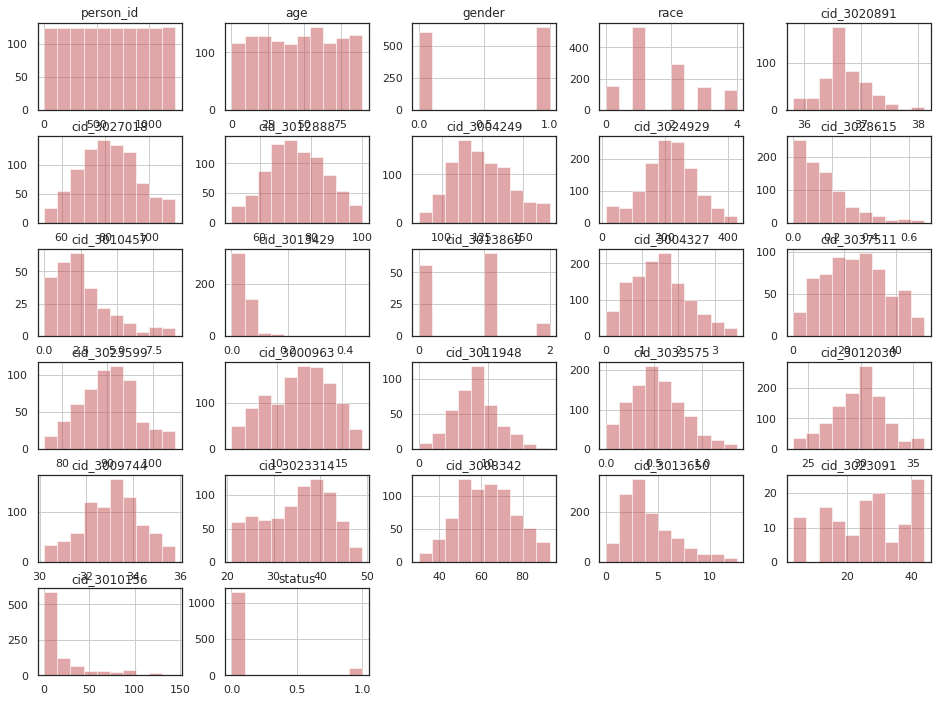

In [ ]:
df_mergeall_v2.hist(figsize=(16,12), alpha=0.5, label='x',color='r')

In [ ]:
from fancyimpute import IterativeImputer

In [ ]:
mice_imputer = IterativeImputer()
# imputing the missing value with mice imputer
df = mice_imputer.fit_transform(df_mergeall_v2)

In [ ]:
df_mergeall_v3 = pd.DataFrame(df,columns=df_mergeall_v2.columns.tolist())

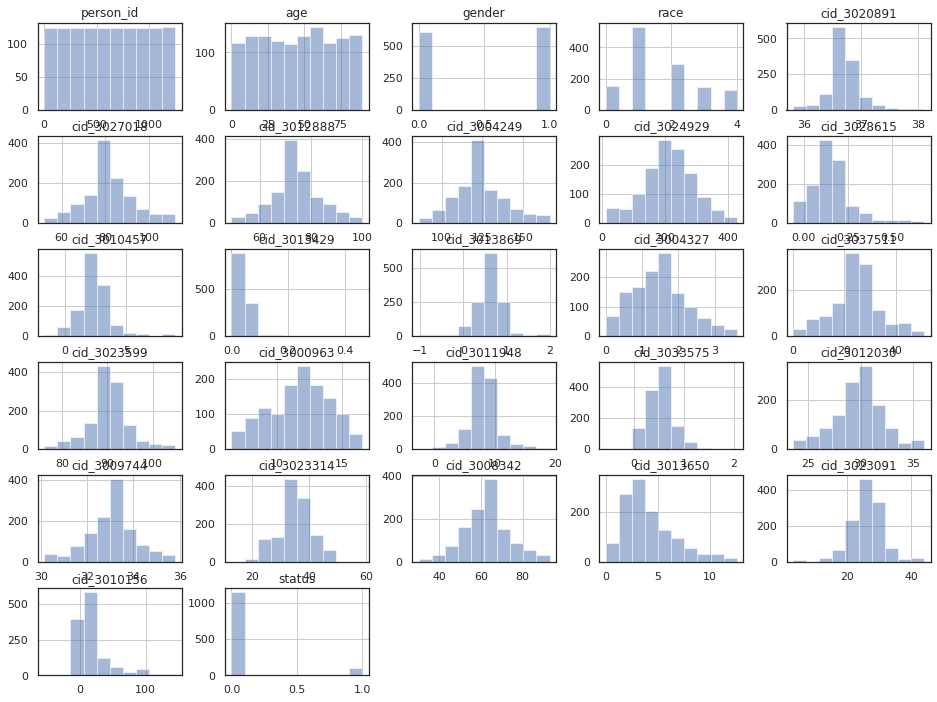

In [ ]:
axes = df_mergeall_v3.hist(figsize=(16,12), alpha=0.5, label='x',color='b')

In [ ]:
1

1

In [ ]:
ss = StandardScaler()
development_features_ss = pd.DataFrame(ss.fit_transform(df_mergeall_v2), columns =  df_mergeall_v2.columns.tolist())

In [ ]:
development_features_ss.head()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3010457,cid_3013429,cid_3013869,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3011948,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3023091,cid_3010156,status
0,-1.730667,0.886347,-1.031677,-1.444678,0.755451,-0.316392,0.333503,1.755810,-0.368567,-0.397327,NaN,NaN,2.190366,-0.974348,NaN,NaN,1.585166,NaN,0.076447,-2.173836,0.568006,-1.274080,NaN,-0.325535,NaN,-0.597078,-0.305829
1,-1.727898,1.541404,-1.031677,-0.572853,-0.012962,2.295851,-1.466044,NaN,1.396762,0.253715,NaN,NaN,NaN,-0.935435,NaN,NaN,0.703049,NaN,0.556449,0.421958,1.215695,NaN,NaN,2.211959,NaN,-0.654500,-0.305829
2,-1.725129,-0.693498,0.969296,-0.572853,NaN,2.071945,-0.116384,0.833541,1.212873,NaN,NaN,NaN,NaN,0.322738,0.140274,1.375434,NaN,NaN,0.777988,1.070907,NaN,NaN,0.391571,-0.431921,NaN,NaN,-0.305829
3,-1.722360,0.038625,-1.031677,0.298971,1.267726,NaN,-1.016157,-0.261654,-1.128639,-0.759017,NaN,-0.23452,NaN,0.115204,-0.614686,NaN,-0.221074,-1.53537,-0.809710,-0.389227,0.325123,1.425473,-0.858266,-0.238850,-1.078128,NaN,-0.305829
4,-1.719591,1.271675,-1.031677,0.298971,-0.269100,-0.092485,NaN,-0.722788,-1.324786,-1.120707,NaN,NaN,NaN,0.724834,NaN,0.431051,-0.095058,NaN,-0.292785,0.219162,1.377617,NaN,NaN,-0.211269,NaN,-0.705167,-0.305829


In [ ]:
df_mergeall_v3.to_csv('final_dataset_v1_impute_fcy.csv',sep='\t',index=False)

In [ ]:
from sklearn.impute import KNNImputer
kimputer = KNNImputer(n_neighbors=3)

In [ ]:
my_imputer = kimputer 
imputed_train_features_cont = pd.DataFrame(my_imputer.fit_transform(df_mergeall_v2),columns =df_mergeall_v2.columns.tolist())

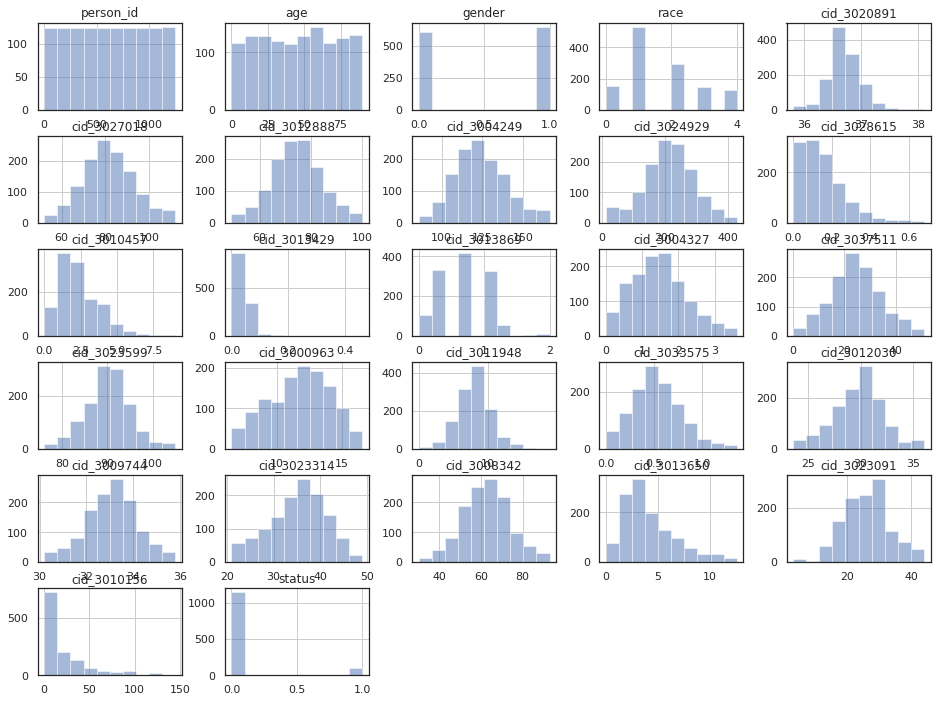

In [ ]:
axes = imputed_train_features_cont.hist(figsize=(16,12), alpha=0.5, label='x',color='b')

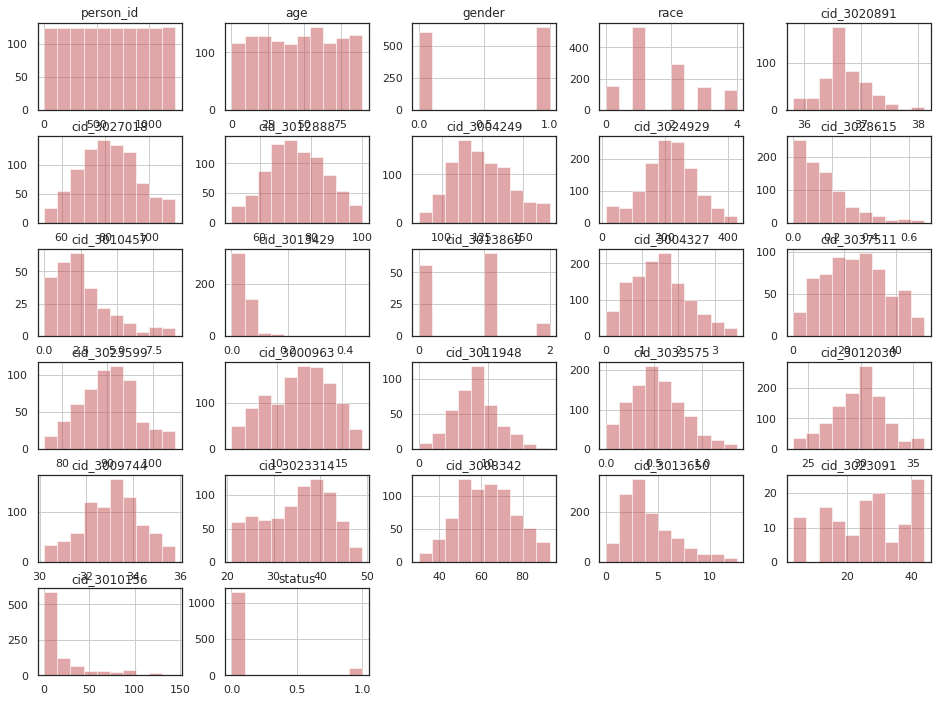

In [ ]:
axes = df_mergeall_v2.hist(figsize=(16,12), alpha=0.5, label='x',color='r')

In [ ]:
my_imputer = kimputer 
imputed_train_features_cont2 = pd.DataFrame(my_imputer.fit_transform(df_mergeall_v2),columns =df_mergeall_v2.columns.tolist())

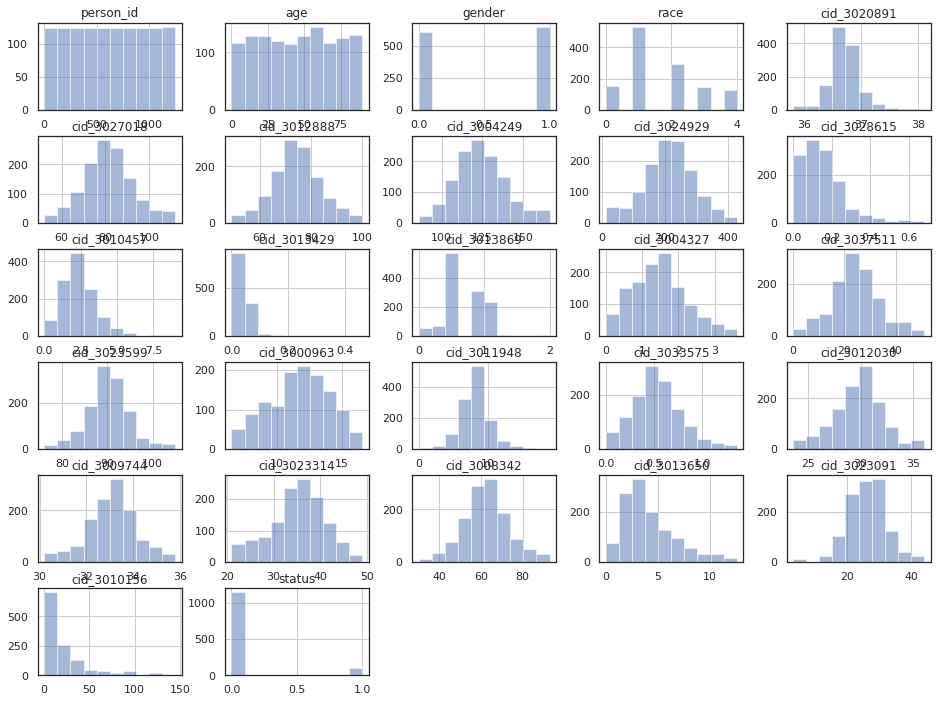

In [ ]:
axes = imputed_train_features_cont2.hist(figsize=(16,12), alpha=0.5, label='x',color='b')

In [ ]:
imputed_train_features_cont.to_csv('final_dataset_v1_impute_knn.csv',sep='\t',index=False)

In [ ]:
1

1

In [ ]:
df_mergeall_v2.head()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3010457,cid_3013429,cid_3013869,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3011948,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3023091,cid_3010156,status
0,0,68,0,0,37.0,77.0,78.0,154.0,184.0,0.10,NaN,NaN,2.0,0.73,NaN,NaN,15.5,NaN,0.55,24.4,33.8,26.0,NaN,3.34,NaN,3.4,0
1,1,85,0,1,36.7,112.0,58.0,NaN,328.0,0.19,NaN,NaN,NaN,0.76,NaN,NaN,13.4,NaN,0.68,30.8,34.6,NaN,NaN,9.78,NaN,1.7,0
2,2,27,1,1,NaN,109.0,73.0,138.0,313.0,NaN,NaN,NaN,NaN,1.73,26.0,99.0,NaN,NaN,0.74,32.4,NaN,NaN,68.0,3.07,NaN,NaN,0
3,3,46,0,2,37.2,NaN,63.0,119.0,122.0,0.05,NaN,0.03,NaN,1.57,17.0,NaN,11.2,3.0,0.31,28.8,33.5,45.0,51.0,3.56,13.0,NaN,0
4,4,78,0,2,36.6,80.0,NaN,111.0,106.0,0.00,NaN,NaN,NaN,2.04,NaN,93.0,11.5,NaN,0.45,30.3,34.8,NaN,NaN,3.63,NaN,0.2,0


In [ ]:
df_mergeall_v2[df_mergeall_v2.status==1].shape

(107, 27)

In [ ]:
df.shape

(1251, 27)

In [ ]:
sorted(df_mergeall_v2.isnull().sum())

[0,
 0,
 0,
 0,
 0,
 13,
 25,
 67,
 95,
 163,
 243,
 332,
 335,
 398,
 423,
 428,
 435,
 488,
 518,
 592,
 658,
 757,
 761,
 835,
 983,
 1120,
 1123]

In [ ]:
df_mergeall_v2.isnull().sum()

person_id         0
age               0
gender            0
race              0
cid_3020891     757
cid_3027018     398
cid_3012888     423
cid_3004249     335
cid_3024929      25
cid_3028615     435
cid_3010457     983
cid_3013429     761
cid_3013869    1120
cid_3004327      67
cid_3037511     592
cid_3023599     658
cid_3000963      95
cid_3011948     835
cid_3033575     243
cid_3012030     163
cid_3009744     428
cid_3023314     488
cid_3008342     518
cid_3013650      13
cid_3023091    1123
cid_3010156     332
status            0
dtype: int64

In [ ]:
alist = []

In [ ]:
for c in df_mergeall.columns.tolist():
  if df_mergeall[c].isnull().sum() == 1251:
    print(c,df_mergeall[c].isnull().sum())
    alist.append(c)

In [ ]:
for c in df_mergeall.columns.tolist():
  print(c,df_mergeall[c].isnull().sum())

In [ ]:
df_n1[(df_n1.person_id==0)&(df_n1.measurement_concept_id==uniq_mids[0])].sort_values(['measurement_date'])['value_as_number'].values.tolist()

,person_id,measurement_id,measurement_concept_id,measurement_date,measurement_datetime,value_as_number,unit_concept_id,unit_source_value
5,0,101991,3000905,2011-09-01,2011-09-01 14:41:00,4.42,8848.0,10*3/uL
3,0,55657,3000905,2012-05-15,2012-05-15 14:41:00,8.27,8848.0,10*3/uL
6,0,105438,3000905,2013-07-23,2013-07-23 14:41:00,2.40,8848.0,10*3/uL
4,0,70305,3000905,2015-06-27,2015-06-27 14:41:00,4.73,8848.0,10*3/uL
8,0,151976,3000905,2016-08-01,2016-08-01 14:41:00,4.17,8848.0,10*3/uL
9,0,194174,3000905,2017-01-20,2017-01-20 14:41:00,5.10,8848.0,10*3/uL
7,0,135218,3000905,2017-09-03,2017-09-03 14:41:00,16.31,8848.0,10*3/uL


In [ ]:
df_n1[(df_n1.person_id==0)&(df_n1.measurement_concept_id==uniq_mids[0])].sort_values(['measurement_date'])['value_as_number'].values.tolist()[-1]

16.31

In [ ]:
## feature importance

In [ ]:
!pip install git+https://github.com/smazzanti/mrmr

  Cloning https://github.com/smazzanti/mrmr to /tmp/pip-req-build-k_4t8jqf
  Running command git clone -q https://github.com/smazzanti/mrmr /tmp/pip-req-build-k_4t8jqf
     |████████████████████████████████| 81kB 3.3MB/s 
  Created wheel for mrmr: filename=mrmr-0.1-cp37-none-any.whl size=3825 sha256=5dec7e3a6321aeed612e6f38a9ae64c5f2dc6e6d3dc268ed1ec07f56003f4552
  Stored in directory: /tmp/pip-ephem-wheel-cache-tozy_81o/wheels/75/e9/f7/22e4f6cddbb8d48ff31f282def112581c80d4a0536f86fe14d
Successfully built mrmr


In [ ]:
from mrmr import mrmr_classif
from sklearn.datasets import make_classification

# create some data
X, y = make_classification(n_samples = 1000, n_features = 50, n_informative = 10, n_redundant = 40)
X = pd.DataFrame(X)
y = pd.Series(y)

# use mrmr classification
selected_features = mrmr_classif(X, y, K = 10)

In [ ]:
selected_features

[23, 35, 4, 37, 26, 10, 17, 2, 7, 12]

In [ ]:
imputed_train_features_cont.head()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3010457,cid_3013429,cid_3013869,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3011948,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3023091,cid_3010156,status
0,0.0,68.0,0.0,0.0,37.000000,77.0,78.000000,154.000000,184.0,0.100000,2.000000,0.013333,2.000000,0.73,38.000000,88.666667,15.500000,6.000000,0.55,24.4,33.800000,26.000000,50.000000,3.34,27.000000,3.400000,0.0
1,1.0,85.0,0.0,1.0,36.700000,112.0,58.000000,136.333333,328.0,0.190000,1.333333,0.060000,0.666667,0.76,23.000000,97.666667,13.400000,9.000000,0.68,30.8,34.600000,38.000000,69.666667,9.78,27.666667,1.700000,0.0
2,2.0,27.0,1.0,1.0,36.733333,109.0,73.000000,138.000000,313.0,0.356667,3.333333,0.043333,0.666667,1.73,26.000000,99.000000,14.066667,11.000000,0.74,32.4,32.633333,40.666667,68.000000,3.07,27.666667,7.700000,0.0
3,3.0,46.0,0.0,2.0,37.200000,84.0,63.000000,119.000000,122.0,0.050000,4.000000,0.030000,1.000000,1.57,17.000000,93.666667,11.200000,3.000000,0.31,28.8,33.500000,45.000000,51.000000,3.56,13.000000,2.566667,0.0
4,4.0,78.0,0.0,2.0,36.600000,80.0,77.333333,111.000000,106.0,0.000000,4.000000,0.043333,1.000000,2.04,29.666667,93.000000,11.500000,8.666667,0.45,30.3,34.800000,35.333333,54.000000,3.63,19.333333,0.200000,0.0


In [ ]:
imputed_train_features_cont.drop(['status','person_id'],axis=1).shape

(1251, 25)

In [ ]:
selected_features3 = mrmr_classif(imputed_train_features_cont.drop(['status','person_id'],axis=1), imputed_train_features_cont[['status']], K = 26)

In [ ]:
selected_features1

['cid_3033575',
 'cid_3013650',
 'cid_3008342',
 'cid_3004327',
 'cid_3027018',
 'cid_3009744',
 'cid_3023599',
 'cid_3011948',
 'cid_3023091',
 'cid_3013869']

In [ ]:
selected_features2

['cid_3033575',
 'cid_3013650',
 'cid_3008342',
 'cid_3004327',
 'cid_3027018',
 'cid_3009744',
 'cid_3023599',
 'cid_3011948',
 'cid_3023091',
 'cid_3013869',
 'age',
 'cid_3012888',
 'cid_3012030',
 'cid_3004249',
 'cid_3024929',
 'cid_3010156',
 'gender',
 'cid_3020891',
 'cid_3000963',
 'cid_3010457']

In [ ]:
selected_features3

['cid_3033575',
 'cid_3013650',
 'cid_3008342',
 'cid_3004327',
 'cid_3027018',
 'cid_3009744',
 'cid_3023599',
 'cid_3011948',
 'cid_3023091',
 'cid_3013869',
 'age',
 'cid_3012888',
 'cid_3012030',
 'cid_3004249',
 'cid_3024929',
 'cid_3010156',
 'gender',
 'cid_3020891',
 'cid_3000963',
 'cid_3010457',
 'cid_3023314',
 'cid_3028615',
 'race',
 'cid_3037511',
 'cid_3013429']

In [ ]:
x = imputed_train_features_cont.copy()

In [ ]:
x.shape

(1251, 27)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score


x_train, x_test, y_train, y_test = train_test_split(x.drop(['status','person_id'],axis=1), x[['status']], test_size=0.2, random_state=42)

Accuracy is:  0.9322709163346613


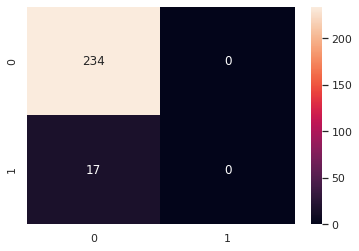

In [ ]:

clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 6
Best features : Index(['age', 'cid_3004249', 'cid_3004327', 'cid_3033575', 'cid_3008342',
       'cid_3013650'],
      dtype='object')


#Feature importance

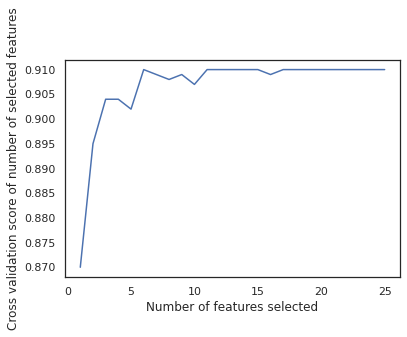

In [ ]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

1. feature 21 (0.060399)
2. feature 22 (0.055211)
3. feature 17 (0.052902)
4. feature 12 (0.051999)
5. feature 0 (0.051656)
6. feature 14 (0.047660)
7. feature 5 (0.045509)
8. feature 19 (0.045306)
9. feature 4 (0.045089)
10. feature 23 (0.043578)
11. feature 7 (0.043256)
12. feature 6 (0.042396)
13. feature 13 (0.041347)
14. feature 24 (0.040234)
15. feature 3 (0.039629)
16. feature 18 (0.039133)
17. feature 10 (0.038885)
18. feature 20 (0.037356)
19. feature 16 (0.037213)
20. feature 8 (0.035724)
21. feature 15 (0.035672)
22. feature 9 (0.029424)
23. feature 11 (0.017920)
24. feature 2 (0.016951)
25. feature 1 (0.005550)


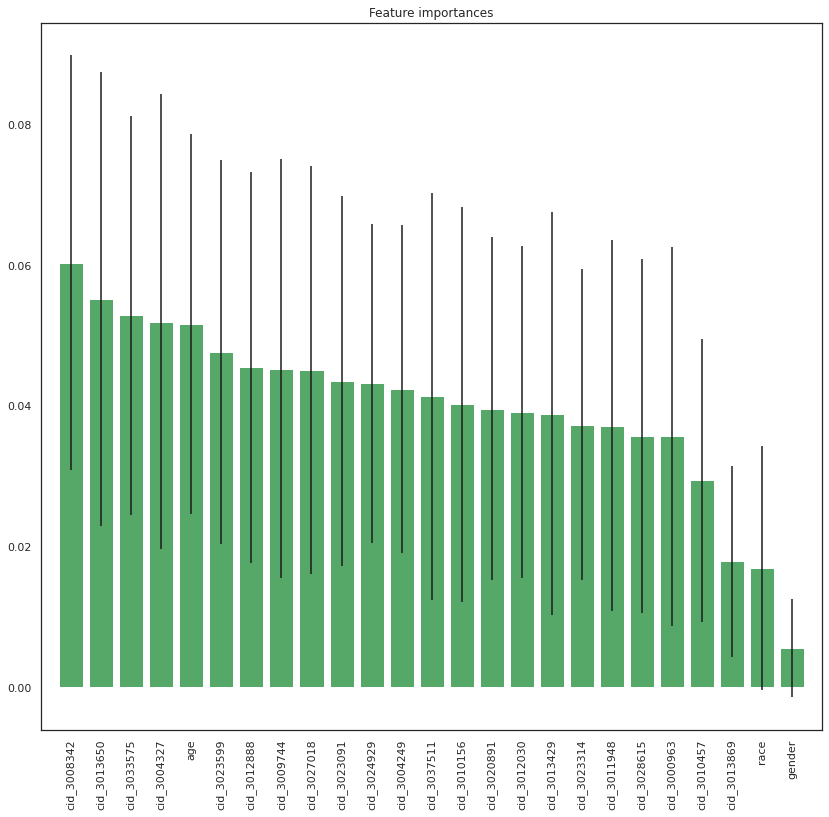

In [ ]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot
plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [ ]:
x.shape[0] - x.dropna().shape[0]

0

#Correlation plots

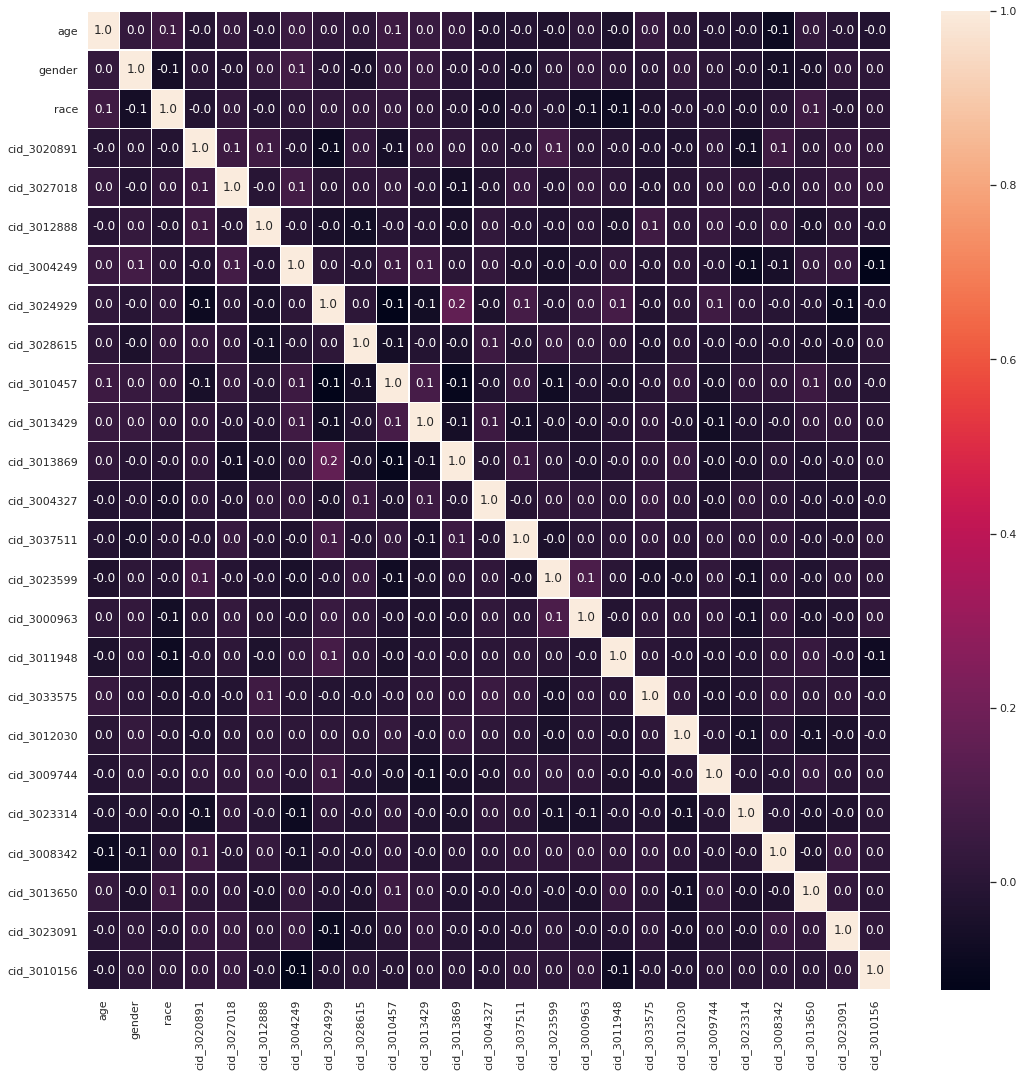

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.drop(['person_id','status'],axis=1).corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
df_mergeall_v2.columns

Index(['person_id', 'age', 'gender', 'race', 'cid_3020891', 'cid_3027018',
       'cid_3012888', 'cid_3004249', 'cid_3024929', 'cid_3028615',
       'cid_3010457', 'cid_3013429', 'cid_3013869', 'cid_3004327',
       'cid_3037511', 'cid_3023599', 'cid_3000963', 'cid_3011948',
       'cid_3033575', 'cid_3012030', 'cid_3009744', 'cid_3023314',
       'cid_3008342', 'cid_3013650', 'cid_3023091', 'cid_3010156', 'status'],
      dtype='object')

In [ ]:
df_mergeall_v4 = df_mergeall_v2[['person_id', 'age', 'gender', 'race', 'cid_3020891', 'cid_3027018',
       'cid_3012888', 'cid_3004249', 'cid_3024929', 'cid_3028615', 'cid_3013429', 'cid_3004327',
       'cid_3037511', 'cid_3023599', 'cid_3000963',
       'cid_3033575', 'cid_3012030', 'cid_3009744', 'cid_3023314',
       'cid_3008342', 'cid_3013650', 'cid_3010156', 'status']].copy()

In [ ]:
df_mergeall_v4.shape

(1251, 23)

In [ ]:
df_mergeall_v4.head()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,status
0,0,68,0,0,37.0,77.0,78.0,154.0,184.0,0.10,NaN,0.73,NaN,NaN,15.5,0.55,24.4,33.8,26.0,NaN,3.34,3.4,0
1,1,85,0,1,36.7,112.0,58.0,NaN,328.0,0.19,NaN,0.76,NaN,NaN,13.4,0.68,30.8,34.6,NaN,NaN,9.78,1.7,0
2,2,27,1,1,NaN,109.0,73.0,138.0,313.0,NaN,NaN,1.73,26.0,99.0,NaN,0.74,32.4,NaN,NaN,68.0,3.07,NaN,0
3,3,46,0,2,37.2,NaN,63.0,119.0,122.0,0.05,0.03,1.57,17.0,NaN,11.2,0.31,28.8,33.5,45.0,51.0,3.56,NaN,0
4,4,78,0,2,36.6,80.0,NaN,111.0,106.0,0.00,NaN,2.04,NaN,93.0,11.5,0.45,30.3,34.8,NaN,NaN,3.63,0.2,0


In [ ]:
df_mergeall_v4.loc[0].isnull().sum()

4

In [ ]:
kimputer

KNNImputer(add_indicator=False, copy=True, metric='nan_euclidean',
           missing_values=nan, n_neighbors=3, weights='uniform')

In [ ]:
my_imputer = kimputer 
df_full = pd.DataFrame(my_imputer.fit_transform(df_mergeall_v4),columns =df_mergeall_v4.columns.tolist())

In [ ]:
df_full.head()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,status
0,0.0,68.0,0.0,0.0,37.000000,77.0,78.000000,154.000000,184.0,0.100000,0.013333,0.73,38.000000,88.666667,15.500000,0.55,24.4,33.800000,26.000000,50.000000,3.34,3.4,0.0
1,1.0,85.0,0.0,1.0,36.700000,112.0,58.000000,136.333333,328.0,0.190000,0.060000,0.76,23.000000,97.666667,13.400000,0.68,30.8,34.600000,38.000000,69.666667,9.78,1.7,0.0
2,2.0,27.0,1.0,1.0,36.733333,109.0,73.000000,138.000000,313.0,0.356667,0.043333,1.73,26.000000,99.000000,14.066667,0.74,32.4,32.633333,40.666667,68.000000,3.07,7.7,0.0
3,3.0,46.0,0.0,2.0,37.200000,79.0,63.000000,119.000000,122.0,0.050000,0.030000,1.57,17.000000,93.666667,11.200000,0.31,28.8,33.500000,45.000000,51.000000,3.56,11.2,0.0
4,4.0,78.0,0.0,2.0,36.600000,80.0,77.333333,111.000000,106.0,0.000000,0.043333,2.04,29.666667,93.000000,11.500000,0.45,30.3,34.800000,35.333333,54.000000,3.63,0.2,0.0


In [ ]:
df_full.isnull().any()

In [ ]:
df_full.to_csv('final_df_full_1251.csv',sep='\t',index=False)

In [ ]:
res = dict()

In [ ]:
for i in range(0,1251):
  x = df_mergeall_v4.loc[i].isnull().sum()
  res[i] = x

In [ ]:
res

In [ ]:
h_list = df_mergeall_v4[df_mergeall_v4.status==1]['person_id'].values.tolist()

In [ ]:
df_mergeall_v4.to_csv('abc.csv',sep='\t',index=False)

In [ ]:
b = dict()

In [ ]:
for k,v in res.items():
  if k not in h_list:
    b[k] = v

In [ ]:
len(b)

1144

In [ ]:
import collections

sorted_dict = collections.OrderedDict(b)


In [ ]:
sorted_dict

In [ ]:
sorted_dict = {k: v for k, v in sorted(b.items(), key=lambda item: item[1])}

In [ ]:
sorted_dict

In [ ]:
first107pairs = {k: sorted_dict[k] for k in list(sorted_dict)[:107]}


In [ ]:
len(first107pairs)

107

In [ ]:
first107pairs

In [ ]:
nh_list = []

In [ ]:
for k,v in first107pairs.items():
  nh_list.append(k)

In [ ]:
nh_list

In [ ]:
final_list = h_list+nh_list

In [ ]:
len(final_list)

214

In [ ]:
## final balanced dataset

In [ ]:
df_mergeall_v4[df_mergeall_v4.person_id.isin(final_list)].shape

(214, 23)

In [ ]:
df_mergeall_v5 = df_mergeall_v4[df_mergeall_v4.person_id.isin(final_list)].copy()

In [ ]:
df_mergeall_v5.shape

(214, 23)

In [ ]:
df_mergeall_v5.head()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,status
3,3,46,0,2,37.2,NaN,63.0,119.0,122.0,0.05,0.03,1.57,17.0,NaN,11.2,0.31,28.8,33.5,45.0,51.0,3.56,NaN,0
8,8,3,0,1,NaN,92.0,NaN,105.0,372.0,NaN,NaN,1.33,NaN,NaN,11.7,0.30,27.1,32.8,NaN,NaN,11.33,NaN,1
12,12,58,0,1,NaN,100.0,67.0,120.0,17.0,0.09,NaN,1.66,30.0,NaN,7.6,0.10,26.5,32.9,36.0,NaN,3.71,12.7,1
16,16,55,1,1,36.7,NaN,NaN,132.0,183.0,0.12,0.02,2.30,NaN,91.0,9.0,0.44,27.6,33.8,30.0,37.0,5.88,0.4,0
20,20,28,0,4,36.5,NaN,71.0,130.0,220.0,0.15,0.02,0.59,NaN,NaN,10.7,0.79,31.2,33.8,44.0,77.0,6.91,1.5,0


In [ ]:
del df_mergeall_v5['person_id']

In [ ]:
development_features, test_features, development_labels, test_labels = train_test_split(df_mergeall_v5.drop(['status'],axis=1),df_mergeall_v5[['status']],test_size=0.2,stratify = df_mergeall_v5[['status']], random_state=64)

In [ ]:
my_imputer = kimputer 
df_214_train = pd.DataFrame(my_imputer.fit_transform(development_features),columns = development_features.columns.tolist())

In [ ]:
df_214_test = pd.DataFrame(my_imputer.fit_transform(test_features),columns = test_features.columns.tolist())

In [ ]:
df_214_train.head()

,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156
0,43.0,0.0,4.0,36.900000,91.000000,60.000000,142.000000,204.0,0.120000,0.020000,2.26,38.000000,97.666667,14.5,0.580000,28.700000,34.100000,32.000000,83.000000,5.26,9.700000
1,82.0,0.0,1.0,36.933333,84.000000,81.000000,128.000000,146.0,0.173333,0.043333,1.79,33.000000,92.000000,8.5,0.396667,28.300000,32.833333,38.000000,60.000000,1.67,3.800000
2,3.0,0.0,1.0,36.600000,92.000000,72.666667,105.000000,372.0,0.123333,0.066667,1.33,35.000000,87.333333,11.7,0.300000,27.100000,32.800000,40.666667,65.333333,11.33,47.233333
3,26.0,0.0,1.0,36.900000,103.000000,73.000000,132.333333,104.0,0.090000,0.030000,1.50,28.666667,99.000000,11.5,0.400000,30.200000,31.100000,35.333333,62.666667,1.99,7.000000
4,3.0,0.0,1.0,36.733333,83.666667,84.000000,110.000000,150.0,0.176667,0.040000,1.27,18.666667,89.333333,13.7,0.636667,30.866667,32.700000,34.333333,69.000000,2.97,3.366667


In [ ]:
my_imputer = kimputer 
df_214 = pd.DataFrame(my_imputer.fit_transform(df_mergeall_v5),columns = df_mergeall_v5.columns.tolist())

In [ ]:
df_214.head()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,status
0,3.0,46.0,0.0,2.0,37.200000,101.000000,63.000000,119.0,122.0,0.050000,0.030000,1.57,17.000000,85.666667,11.2,0.31,28.8,33.5,45.000000,51.000000,3.56,15.433333,0.0
1,8.0,3.0,0.0,1.0,36.633333,92.000000,81.333333,105.0,372.0,0.343333,0.053333,1.33,13.666667,91.000000,11.7,0.30,27.1,32.8,32.666667,83.333333,11.33,5.466667,1.0
2,12.0,58.0,0.0,1.0,37.066667,100.000000,67.000000,120.0,17.0,0.090000,0.046667,1.66,30.000000,87.333333,7.6,0.10,26.5,32.9,36.000000,62.000000,3.71,12.700000,1.0
3,16.0,55.0,1.0,1.0,36.700000,96.333333,73.333333,132.0,183.0,0.120000,0.020000,2.30,14.333333,91.000000,9.0,0.44,27.6,33.8,30.000000,37.000000,5.88,0.400000,0.0
4,20.0,28.0,0.0,4.0,36.500000,97.000000,71.000000,130.0,220.0,0.150000,0.020000,0.59,22.333333,84.666667,10.7,0.79,31.2,33.8,44.000000,77.000000,6.91,1.500000,0.0


In [ ]:
df_214.to_csv('final_df_balanced_data.csv',sep='\t',index=False)

## Evaluation dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/bmed_8813/final_project/q2_synthetic_data_08-19-2020/release_08-19-2020/evaluation/measurement.csv',sep=',')
df_n1 = df[['person_id', 'measurement_id', 'measurement_concept_id',
       'measurement_date', 'measurement_datetime',
       'value_as_number', 'unit_concept_id',
       'unit_source_value']].copy()
dfp = pd.read_csv('/content/drive/MyDrive/bmed_8813/final_project/q2_synthetic_data_08-19-2020/release_08-19-2020/evaluation/person.csv',sep=',')
df4 = pd.read_csv("/content/drive/MyDrive/bmed_8813/final_project/q2_synthetic_data_08-19-2020/release_08-19-2020/evaluation/goldstandard.csv",sep=',')


In [ ]:
df.shape

(88996, 20)

In [ ]:
uniq_mids = df_n1.measurement_concept_id.unique().tolist()

In [ ]:
len(uniq_mids)

335

In [ ]:
cols_m = ['cid_'+str(x) for x in sorted(uniq_mids)]

In [ ]:
cols_m[:10]

['cid_706163',
 'cid_706181',
 'cid_3000067',
 'cid_3000185',
 'cid_3000285',
 'cid_3000483',
 'cid_3000515',
 'cid_3000593',
 'cid_3000620',
 'cid_3000712']

In [ ]:
final_cols = ['person_id','age','gender','race']+cols_m

In [ ]:
df_mergeall = pd.DataFrame(columns=final_cols)

In [ ]:
df_mergeall.shape

(0, 339)

In [ ]:
df_mergeall['person_id'] = sorted(df_n1.person_id.unique().tolist())

In [ ]:
df_mergeall.head()

,person_id,age,gender,race,cid_706163,cid_706181,cid_3000067,cid_3000185,cid_3000285,cid_3000483,cid_3000515,cid_3000593,cid_3000620,cid_3000712,cid_3000905,cid_3000963,cid_3001127,cid_3001405,cid_3001420,cid_3001599,cid_3001784,cid_3002173,cid_3002400,cid_3002551,cid_3003181,cid_3003245,cid_3003262,cid_3003396,cid_3003515,cid_3003694,cid_3003785,cid_3003932,cid_3003985,cid_3004090,cid_3004119,cid_3004147,cid_3004248,cid_3004249,cid_3004295,cid_3004327,...,cid_3041952,cid_3042065,cid_3042194,cid_3042299,cid_3042596,cid_3043000,cid_3044171,cid_3044254,cid_3044938,cid_3045716,cid_3046279,cid_3047826,cid_3048220,cid_3048264,cid_3048559,cid_3048578,cid_3049187,cid_3050068,cid_3051593,cid_3051825,cid_3053283,cid_40757349,cid_40758926,cid_40759883,cid_40760093,cid_40761510,cid_40761514,cid_40763528,cid_40765040,cid_40765161,cid_40767502,cid_40769146,cid_40769408,cid_40770918,cid_42869447,cid_42869452,cid_42869531,cid_42870366,cid_44786754,cid_46235338
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_mergeall.shape

(536, 339)

In [ ]:
df_n1 = df_n1.sort_values(['person_id','measurement_concept_id']).reset_index(drop=True)

In [ ]:
for i,r in df_n1.iterrows():
  if df_n1[(df_n1.person_id==r.person_id)&(df_n1.measurement_concept_id==r.measurement_concept_id)].shape[0] > 1:
    df_mergeall.loc[r.person_id,f'cid_{r.measurement_concept_id}'] = df_n1[(df_n1.person_id==r.person_id)&(df_n1.measurement_concept_id==r.measurement_concept_id)].sort_values(['measurement_date'])['value_as_number'].values.tolist()[-1]
  else:
    df_mergeall.loc[r.person_id,f'cid_{r.measurement_concept_id}'] = r.value_as_number

In [ ]:
dfp['age'] = 0

In [ ]:
df_mergeall.shape

(536, 339)

In [ ]:
for i,r in dfp.iterrows():
  dfp.loc[i,'age'] = calculate_age(datetime.strptime(r.birth_datetime,'%Y-%m-%d'))

In [ ]:
for i,r in df_mergeall.iterrows():
  df_mergeall.loc[i,'age'] = int(dfp[dfp.person_id==r.person_id]['age'].values.tolist()[0])
  df_mergeall.loc[i,'gender'] = dfp[dfp.person_id==r.person_id]['gender_source_value'].values.tolist()[0]
  df_mergeall.loc[i,'race'] = str(dfp[dfp.person_id==r.person_id]['race_concept_id'].values.tolist()[0])

In [ ]:
df_mergeall.head()

,person_id,age,gender,race,cid_706163,cid_706181,cid_3000067,cid_3000185,cid_3000285,cid_3000483,cid_3000515,cid_3000593,cid_3000620,cid_3000712,cid_3000905,cid_3000963,cid_3001127,cid_3001405,cid_3001420,cid_3001599,cid_3001784,cid_3002173,cid_3002400,cid_3002551,cid_3003181,cid_3003245,cid_3003262,cid_3003396,cid_3003515,cid_3003694,cid_3003785,cid_3003932,cid_3003985,cid_3004090,cid_3004119,cid_3004147,cid_3004248,cid_3004249,cid_3004295,cid_3004327,...,cid_3041952,cid_3042065,cid_3042194,cid_3042299,cid_3042596,cid_3043000,cid_3044171,cid_3044254,cid_3044938,cid_3045716,cid_3046279,cid_3047826,cid_3048220,cid_3048264,cid_3048559,cid_3048578,cid_3049187,cid_3050068,cid_3051593,cid_3051825,cid_3053283,cid_40757349,cid_40758926,cid_40759883,cid_40760093,cid_40761510,cid_40761514,cid_40763528,cid_40765040,cid_40765161,cid_40767502,cid_40769146,cid_40769408,cid_40770918,cid_42869447,cid_42869452,cid_42869531,cid_42870366,cid_44786754,cid_46235338
0,0,31,M,8552,NaN,NaN,NaN,28,137,NaN,NaN,NaN,NaN,NaN,6.44,13.5,NaN,NaN,NaN,NaN,21,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,0.8,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,13.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4.9,NaN
1,1,41,M,8552,NaN,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,6.44,12.5,NaN,NaN,NaN,NaN,NaN,7.2,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,NaN,0.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,0.5,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.7,NaN
2,2,74,F,8527,NaN,NaN,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.01,15.2,NaN,0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130,NaN,0.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.1,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,0.41,NaN,NaN
3,3,6,M,8527,NaN,NaN,NaN,NaN,139,NaN,NaN,NaN,NaN,NaN,4.2,9.4,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN,16.2,NaN,NaN,NaN,NaN,NaN,1.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.18,0.59,6,NaN
4,4,67,M,8527,NaN,NaN,NaN,NaN,NaN,111,NaN,370,NaN,NaN,9.11,11.2,NaN,NaN,2,NaN,NaN,NaN,95,NaN,NaN,NaN,NaN,8.6,NaN,NaN,NaN,56,NaN,NaN,NaN,NaN,NaN,101,NaN,0.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,47,51.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.52,11.3,NaN


In [ ]:
dfp.race_concept_id.unique().tolist()

[8552, 8527, 8515, 8557, 8516, 0]

In [ ]:
f_ids = [3020891,3027018,3012888,3004249,3024929,3028615,3013429,3004327,3037511,3023599,3000963,3033575,3012030,3009744,3023314,3008342,3013650,3010156]

In [ ]:
f_ids = ['cid_'+str(x) for x in f_ids]

In [ ]:
f_ids2 = ['person_id','age','gender','race']+f_ids

In [ ]:
df_mergeall_v2 = df_mergeall[f_ids2].copy()

In [ ]:
df_mergeall_v2.shape

(536, 22)

In [ ]:
df_mergeall_v2.head()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156
0,0,31,M,8552,37.3,NaN,70,NaN,323,0,NaN,1.85,33,84,13.5,0.14,28.7,35.4,38,68,5.93,1.1
1,1,41,M,8552,NaN,65,64,95,223,0.03,NaN,0.84,5,NaN,12.5,0.63,31.2,30.6,29,61,8.83,NaN
2,2,74,F,8527,36.7,NaN,NaN,130,253,0.08,NaN,0.19,NaN,NaN,15.2,0.45,31.8,31.3,30,85,10.27,NaN
3,3,6,M,8527,36.8,74,NaN,NaN,NaN,NaN,NaN,1.55,NaN,87,9.4,0.41,30.3,32.8,NaN,39,1.87,NaN
4,4,67,M,8527,NaN,NaN,82,101,191,0,NaN,0.16,17,87,11.2,1.01,27.9,31.1,38,47,8,2.6


In [ ]:
df_mergeall_v2['status'] = 0

In [ ]:
for i,r in df_mergeall_v2.iterrows():
  df_mergeall_v2.loc[i,'status'] = int(df4[df4.person_id==r.person_id]['status'].values.tolist()[0])

In [ ]:
df_mergeall_v2[df_mergeall_v2.status==1].shape

(42, 23)

In [ ]:
df_mergeall_v2[df_mergeall_v2.status==0].shape

(494, 23)

In [ ]:
df_mergeall_v2.describe()

,person_id,status
count,1251.000000,1251.000000
mean,625.000000,0.085532
std,361.276902,0.279783
min,0.000000,0.000000
25%,312.500000,0.000000
50%,625.000000,0.000000
75%,937.500000,0.000000
max,1250.000000,1.000000


In [ ]:
for i,r in df_mergeall_v2.iterrows():
  df_mergeall_v2.loc[i,'gender'] = [0 if r.gender=='F' else 1][0]

In [ ]:
df_mergeall_v2.head()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,status
0,0,31,1,8552,37.3,NaN,70,NaN,323,0,NaN,1.85,33,84,13.5,0.14,28.7,35.4,38,68,5.93,1.1,1
1,1,41,1,8552,NaN,65,64,95,223,0.03,NaN,0.84,5,NaN,12.5,0.63,31.2,30.6,29,61,8.83,NaN,0
2,2,74,0,8527,36.7,NaN,NaN,130,253,0.08,NaN,0.19,NaN,NaN,15.2,0.45,31.8,31.3,30,85,10.27,NaN,0
3,3,6,1,8527,36.8,74,NaN,NaN,NaN,NaN,NaN,1.55,NaN,87,9.4,0.41,30.3,32.8,NaN,39,1.87,NaN,0
4,4,67,1,8527,NaN,NaN,82,101,191,0,NaN,0.16,17,87,11.2,1.01,27.9,31.1,38,47,8,2.6,0


In [ ]:
df_mergeall_v2['race'] = df_mergeall_v2['race'].map({'8515':0,'8552':1,'8527':2,'8557':3,'8516':4})

In [ ]:
df_mergeall_v2.head()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,status
0,0,31,1,1.0,37.3,NaN,70,NaN,323,0,NaN,1.85,33,84,13.5,0.14,28.7,35.4,38,68,5.93,1.1,1
1,1,41,1,1.0,NaN,65,64,95,223,0.03,NaN,0.84,5,NaN,12.5,0.63,31.2,30.6,29,61,8.83,NaN,0
2,2,74,0,2.0,36.7,NaN,NaN,130,253,0.08,NaN,0.19,NaN,NaN,15.2,0.45,31.8,31.3,30,85,10.27,NaN,0
3,3,6,1,2.0,36.8,74,NaN,NaN,NaN,NaN,NaN,1.55,NaN,87,9.4,0.41,30.3,32.8,NaN,39,1.87,NaN,0
4,4,67,1,2.0,NaN,NaN,82,101,191,0,NaN,0.16,17,87,11.2,1.01,27.9,31.1,38,47,8,2.6,0


In [ ]:
#df_mergeall_v2['race'] = pd.Categorical(df_mergeall_v2['race'], categories=df_mergeall_v2['race'].unique()).codes

In [ ]:
df_mergeall_v2.head()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,status
0,0,31,1,1.0,37.3,NaN,70,NaN,323,0,NaN,1.85,33,84,13.5,0.14,28.7,35.4,38,68,5.93,1.1,1
1,1,41,1,1.0,NaN,65,64,95,223,0.03,NaN,0.84,5,NaN,12.5,0.63,31.2,30.6,29,61,8.83,NaN,0
2,2,74,0,2.0,36.7,NaN,NaN,130,253,0.08,NaN,0.19,NaN,NaN,15.2,0.45,31.8,31.3,30,85,10.27,NaN,0
3,3,6,1,2.0,36.8,74,NaN,NaN,NaN,NaN,NaN,1.55,NaN,87,9.4,0.41,30.3,32.8,NaN,39,1.87,NaN,0
4,4,67,1,2.0,NaN,NaN,82,101,191,0,NaN,0.16,17,87,11.2,1.01,27.9,31.1,38,47,8,2.6,0


In [ ]:
df_mergeall_v2.race.unique()

array([ 1.,  2.,  0.,  3.,  4., nan])

In [ ]:
df_mergeall_v2.shape

(536, 23)

In [ ]:
df_mergeall_v2.isnull().sum()

person_id        0
age              0
gender           0
race            28
cid_3020891    299
cid_3027018    156
cid_3012888    188
cid_3004249    108
cid_3024929     12
cid_3028615    178
cid_3013429    336
cid_3004327     20
cid_3037511    174
cid_3023599    214
cid_3000963     30
cid_3033575     69
cid_3012030     50
cid_3009744     91
cid_3023314    145
cid_3008342    166
cid_3013650      9
cid_3010156    167
status           0
dtype: int64

In [ ]:
df_mergeall_v2.head()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,status
0,0,31,1,0,37.3,NaN,70,NaN,323,0,NaN,1.85,33,84,13.5,0.14,28.7,35.4,38,68,5.93,1.1,1
1,1,41,1,0,NaN,65,64,95,223,0.03,NaN,0.84,5,NaN,12.5,0.63,31.2,30.6,29,61,8.83,NaN,0
2,2,74,0,1,36.7,NaN,NaN,130,253,0.08,NaN,0.19,NaN,NaN,15.2,0.45,31.8,31.3,30,85,10.27,NaN,0
3,3,6,1,1,36.8,74,NaN,NaN,NaN,NaN,NaN,1.55,NaN,87,9.4,0.41,30.3,32.8,NaN,39,1.87,NaN,0
4,4,67,1,1,NaN,NaN,82,101,191,0,NaN,0.16,17,87,11.2,1.01,27.9,31.1,38,47,8,2.6,0


In [ ]:
df_mergeall_v5.head()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,status
3,3,46,0,2,37.2,NaN,63.0,119.0,122.0,0.05,0.03,1.57,17.0,NaN,11.2,0.31,28.8,33.5,45.0,51.0,3.56,NaN,0
8,8,3,0,1,NaN,92.0,NaN,105.0,372.0,NaN,NaN,1.33,NaN,NaN,11.7,0.30,27.1,32.8,NaN,NaN,11.33,NaN,1
12,12,58,0,1,NaN,100.0,67.0,120.0,17.0,0.09,NaN,1.66,30.0,NaN,7.6,0.10,26.5,32.9,36.0,NaN,3.71,12.7,1
16,16,55,1,1,36.7,NaN,NaN,132.0,183.0,0.12,0.02,2.30,NaN,91.0,9.0,0.44,27.6,33.8,30.0,37.0,5.88,0.4,0
20,20,28,0,4,36.5,NaN,71.0,130.0,220.0,0.15,0.02,0.59,NaN,NaN,10.7,0.79,31.2,33.8,44.0,77.0,6.91,1.5,0


In [ ]:
df_mergeall_v2.to_csv('final_dataset_eval.csv',sep='\t',index=False)

In [ ]:
my_imputer = kimputer 
df_full_eval = pd.DataFrame(my_imputer.fit_transform(df_mergeall_v2),columns =df_mergeall_v2.columns.tolist())

In [ ]:
df_full_eval.shape

(536, 23)

In [ ]:
df_full_eval.head()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,status
0,0.0,31.0,1.0,1.0,37.300000,77.333333,70.000000,114.666667,323.000000,0.000000,0.050000,1.85,33.000000,84.000000,13.5,0.14,28.7,35.4,38.000000,68.0,5.93,1.100000,1.0
1,1.0,41.0,1.0,1.0,36.400000,65.000000,64.000000,95.000000,223.000000,0.030000,0.026667,0.84,5.000000,87.666667,12.5,0.63,31.2,30.6,29.000000,61.0,8.83,11.966667,0.0
2,2.0,74.0,0.0,2.0,36.700000,85.000000,67.000000,130.000000,253.000000,0.080000,0.040000,0.19,25.666667,91.666667,15.2,0.45,31.8,31.3,30.000000,85.0,10.27,9.200000,0.0
3,3.0,6.0,1.0,2.0,36.800000,74.000000,65.333333,115.000000,276.333333,0.096667,0.040000,1.55,17.333333,87.000000,9.4,0.41,30.3,32.8,29.333333,39.0,1.87,35.433333,0.0
4,4.0,67.0,1.0,2.0,36.466667,64.666667,82.000000,101.000000,191.000000,0.000000,0.023333,0.16,17.000000,87.000000,11.2,1.01,27.9,31.1,38.000000,47.0,8.00,2.600000,0.0


In [ ]:
df_full_eval.isnull().any()

person_id      False
age            False
gender         False
race           False
cid_3020891    False
cid_3027018    False
cid_3012888    False
cid_3004249    False
cid_3024929    False
cid_3028615    False
cid_3013429    False
cid_3004327    False
cid_3037511    False
cid_3023599    False
cid_3000963    False
cid_3033575    False
cid_3012030    False
cid_3009744    False
cid_3023314    False
cid_3008342    False
cid_3013650    False
cid_3010156    False
status         False
dtype: bool

In [ ]:
df_full_eval.to_csv('final_df_full_eval.csv',sep='\t',index=False)

In [ ]:
1

1

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pylab import rcParams
import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from numpy.random import seed
seed(1)


In [ ]:
SEED = 123 #used to help randomly select the data points
DATA_SPLIT_PCT = 0.2
rcParams['figure.figsize'] = 8, 6
LABELS = ["Normal","Hospital"]

In [ ]:
# df_full, df_214, df_full_eval

In [ ]:
df_214.head()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,status
0,3.0,46.0,0.0,2.0,37.200000,101.000000,63.000000,119.0,122.0,0.050000,0.030000,1.57,17.000000,85.666667,11.2,0.31,28.8,33.5,45.000000,51.000000,3.56,15.433333,0.0
1,8.0,3.0,0.0,1.0,36.633333,92.000000,81.333333,105.0,372.0,0.343333,0.053333,1.33,13.666667,91.000000,11.7,0.30,27.1,32.8,32.666667,83.333333,11.33,5.466667,1.0
2,12.0,58.0,0.0,1.0,37.066667,100.000000,67.000000,120.0,17.0,0.090000,0.046667,1.66,30.000000,87.333333,7.6,0.10,26.5,32.9,36.000000,62.000000,3.71,12.700000,1.0
3,16.0,55.0,1.0,1.0,36.700000,96.333333,73.333333,132.0,183.0,0.120000,0.020000,2.30,14.333333,91.000000,9.0,0.44,27.6,33.8,30.000000,37.000000,5.88,0.400000,0.0
4,20.0,28.0,0.0,4.0,36.500000,97.000000,71.000000,130.0,220.0,0.150000,0.020000,0.59,22.333333,84.666667,10.7,0.79,31.2,33.8,44.000000,77.000000,6.91,1.500000,0.0


In [ ]:
df_214.shape

(214, 23)

In [ ]:
ss = StandardScaler()
df_214_ss = pd.DataFrame(ss.fit_transform(df_214), columns =  df_214.columns.tolist())

In [ ]:
df_214.columns

Index(['person_id', 'age', 'gender', 'race', 'cid_3020891', 'cid_3027018',
       'cid_3012888', 'cid_3004249', 'cid_3024929', 'cid_3028615',
       'cid_3013429', 'cid_3004327', 'cid_3037511', 'cid_3023599',
       'cid_3000963', 'cid_3033575', 'cid_3012030', 'cid_3009744',
       'cid_3023314', 'cid_3008342', 'cid_3013650', 'cid_3010156', 'status'],
      dtype='object')

In [ ]:
cont_f = ['age','cid_3020891', 'cid_3027018',
       'cid_3012888', 'cid_3004249', 'cid_3024929', 'cid_3028615',
       'cid_3013429', 'cid_3004327', 'cid_3037511', 'cid_3023599',
       'cid_3000963', 'cid_3033575', 'cid_3012030', 'cid_3009744',
       'cid_3023314', 'cid_3008342', 'cid_3013650', 'cid_3010156']

In [ ]:
X_development_cont = df_214_test[cont_f].copy()
columns = X_development_cont.columns.tolist()
X_development_cate_miss = df_214_test.drop(columns,axis =1)
categorical_feature = X_development_cate_miss.columns.tolist()

In [ ]:
ss = StandardScaler()
development_features_ss = pd.DataFrame(ss.fit_transform(X_development_cont), columns =  X_development_cont.columns.tolist())

In [ ]:
df_development_scaled_train = pd.concat([development_features_ss, X_development_cate_miss], axis=1)

In [ ]:
df_development_scaled_test = pd.concat([development_features_ss, X_development_cate_miss], axis=1)

In [ ]:
df_development_scaled_train.head()

,age,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,gender,race
0,-0.099318,0.501703,0.689585,-1.491598,1.092323,-0.155940,-0.317704,-0.443160,0.995939,1.313613,1.039026,1.022706,0.259455,-0.465237,0.876069,-0.306738,1.504081,0.314709,-0.482739,0.0,4.0
1,1.459154,0.597346,0.153009,0.726650,0.228044,-0.889973,0.121527,0.198270,0.339072,0.871200,0.023749,-1.559648,-0.537466,-0.642060,-0.274436,0.691295,-0.235275,-1.033050,-0.694586,0.0,1.0
2,-1.697750,-0.359079,0.766239,-0.153607,-1.191844,1.970226,-0.290252,0.839700,-0.303819,1.048165,-0.812361,-0.182392,-0.957660,-1.172529,-0.304712,1.134866,0.168054,2.593510,0.864941,0.0,1.0
3,-0.778652,0.501703,1.609430,-0.118397,0.495559,-1.421514,-0.564772,-0.168262,-0.066229,0.487775,1.277915,-0.268471,-0.522977,0.197849,-1.848810,0.247725,-0.033611,-0.912915,-0.579686,0.0,1.0
4,-1.697750,0.023491,0.127457,1.043542,-0.883172,-0.839350,0.148979,0.106637,-0.387675,-0.397051,-0.454028,0.678392,0.505776,0.492554,-0.395541,0.081386,0.445343,-0.545003,-0.710145,0.0,1.0


In [ ]:
df_development_scaled_train.shape

(171, 21)

In [ ]:
df_development_scaled.shape

(214, 23)

In [ ]:
df_development_scaled.head()

,age,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,person_id,gender,race,status
0,0.051686,1.438422,1.445927,-1.115112,-0.260761,-1.141887,-0.915600,-0.218696,0.004695,-0.609949,-0.924801,-0.315477,-0.828009,-0.397668,0.318297,1.862425,-0.872934,-0.352223,-0.246549,3.0,0.0,2.0,0.0
1,-1.690503,-0.230790,0.756379,0.741568,-1.127841,1.955769,1.431606,0.416200,-0.321159,-0.911960,0.011485,-0.109354,-0.870376,-1.140716,-0.328955,-0.260927,1.650091,2.645212,-0.610784,8.0,0.0,1.0,1.0
2,0.537879,1.045666,1.369310,-0.710018,-0.198827,-2.442902,-0.595526,0.234802,0.126890,0.567894,-0.632212,-1.799561,-1.717720,-1.402968,-0.236490,0.312952,-0.014585,-0.294357,-0.346440,12.0,0.0,1.0,1.0
3,0.416331,-0.034412,1.088383,-0.068620,0.544385,-0.386059,-0.355471,-0.490794,0.995833,-0.851558,0.011485,-1.222417,-0.277235,-0.922172,0.595691,-0.720030,-1.965378,0.542764,-0.795946,16.0,1.0,1.0,0.0
4,-0.677602,-0.623546,1.139461,-0.304925,0.420517,0.072394,-0.115416,-0.490794,-1.325874,-0.126732,-1.100355,-0.521600,1.205618,0.651342,0.595691,1.690261,1.155890,0.940108,-0.755747,20.0,0.0,4.0,0.0


In [ ]:
X_development_cont = df_full_eval[cont_f].copy()
columns = X_development_cont.columns.tolist()
X_development_cate_miss = df_full_eval.drop(columns,axis =1)
categorical_feature = X_development_cate_miss.columns.tolist()

In [ ]:
ss = StandardScaler()
development_features_ss = pd.DataFrame(ss.fit_transform(X_development_cont), columns =  X_development_cont.columns.tolist())

In [ ]:
df_development_scaled2 = pd.concat([development_features_ss, X_development_cate_miss], axis=1)

In [ ]:
df_development_scaled2.shape

(536, 23)

In [ ]:
df_development_scaled2.head()

,age,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,person_id,gender,race,status
0,-0.534820,1.849979,-0.408552,-0.286056,-0.203039,1.185498,-1.153611,0.659320,0.544413,0.940129,-0.759815,0.992348,-1.343811,-0.307902,1.732670,0.609682,0.464669,0.758442,-0.564621,0.0,1.0,1.0,1.0
1,-0.159163,-0.812401,-1.325320,-0.901961,-1.602540,0.024470,-0.846203,-0.413898,-0.641326,-1.657660,-0.042921,0.524278,0.589357,0.942493,-1.638417,-0.935017,-0.080951,1.935476,-0.017964,1.0,1.0,1.0,0.0
2,1.080502,0.075059,0.161331,-0.594008,0.888097,0.372778,-0.333855,0.199369,-1.404426,0.259756,0.739145,1.788065,-0.120786,1.242588,-1.146800,-0.763383,1.789748,2.519934,-0.157143,2.0,0.0,2.0,0.0
3,-1.473960,0.370879,-0.656327,-0.765093,-0.179319,0.643685,-0.163072,0.199369,0.192213,-0.513396,-0.173266,-0.926736,-0.278596,0.492351,-0.093336,-0.877806,-1.795758,-0.889407,1.162547,3.0,1.0,2.0,0.0
4,0.817543,-0.615188,-1.350098,0.945753,-1.175574,-0.347059,-1.153611,-0.567215,-1.439646,-0.544322,-0.173266,-0.084212,2.088549,-0.708029,-1.287262,0.609682,-1.172192,1.598601,-0.489162,4.0,1.0,2.0,0.0


In [ ]:
df_train = df_development_scaled_train.copy()

In [ ]:
df_valid = df_development_scaled_test.copy()

In [ ]:
df_train, df_test = train_test_split(df, test_size=DATA_SPLIT_PCT, random_state=SEED)

In [ ]:
df_train = df_development_scaled.drop(['person_id'],axis=1).copy()

In [ ]:
df_valid = df_development_scaled2.drop(['person_id'],axis=1).copy()

In [ ]:
df_test = df_development_scaled2.drop(['person_id'],axis=1).copy()

In [ ]:
df_train_0 = df_train.loc[df_development_scaled['status'] == 0]
df_train_1 = df_train.loc[df_development_scaled['status'] == 1]
df_train_0_x = df_train_0.drop(['status'], axis=1)
df_train_1_x = df_train_1.drop(['status'], axis=1)

df_valid_0 = df_valid.loc[df_development_scaled2['status'] == 0]
df_valid_1 = df_valid.loc[df_development_scaled2['status'] == 1]
df_valid_0_x = df_valid_0.drop(['status'], axis=1)
df_valid_1_x = df_valid_1.drop(['status'], axis=1)

df_test_0 = df_test.loc[df['y'] == 0]
df_test_1 = df_test.loc[df['y'] == 1]
df_test_0_x = df_test_0.drop(['y'], axis=1)
df_test_1_x = df_test_1.drop(['y'], axis=1)

In [ ]:
df_train.head()

,age,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,gender,race
0,-0.099318,0.501703,0.689585,-1.491598,1.092323,-0.155940,-0.317704,-0.443160,0.995939,1.313613,1.039026,1.022706,0.259455,-0.465237,0.876069,-0.306738,1.504081,0.314709,-0.482739,0.0,4.0
1,1.459154,0.597346,0.153009,0.726650,0.228044,-0.889973,0.121527,0.198270,0.339072,0.871200,0.023749,-1.559648,-0.537466,-0.642060,-0.274436,0.691295,-0.235275,-1.033050,-0.694586,0.0,1.0
2,-1.697750,-0.359079,0.766239,-0.153607,-1.191844,1.970226,-0.290252,0.839700,-0.303819,1.048165,-0.812361,-0.182392,-0.957660,-1.172529,-0.304712,1.134866,0.168054,2.593510,0.864941,0.0,1.0
3,-0.778652,0.501703,1.609430,-0.118397,0.495559,-1.421514,-0.564772,-0.168262,-0.066229,0.487775,1.277915,-0.268471,-0.522977,0.197849,-1.848810,0.247725,-0.033611,-0.912915,-0.579686,0.0,1.0
4,-1.697750,0.023491,0.127457,1.043542,-0.883172,-0.839350,0.148979,0.106637,-0.387675,-0.397051,-0.454028,0.678392,0.505776,0.492554,-0.395541,0.081386,0.445343,-0.545003,-0.710145,0.0,1.0


In [ ]:
df_train_0_x = df_train.copy()

In [ ]:
df_valid_0_x = df_valid.copy()

In [ ]:
df_test.head()

,age,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,gender,race,status
0,-0.534820,1.849979,-0.408552,-0.286056,-0.203039,1.185498,-1.153611,0.659320,0.544413,0.940129,-0.759815,0.992348,-1.343811,-0.307902,1.732670,0.609682,0.464669,0.758442,-0.564621,1.0,1.0,1.0
1,-0.159163,-0.812401,-1.325320,-0.901961,-1.602540,0.024470,-0.846203,-0.413898,-0.641326,-1.657660,-0.042921,0.524278,0.589357,0.942493,-1.638417,-0.935017,-0.080951,1.935476,-0.017964,1.0,1.0,0.0
2,1.080502,0.075059,0.161331,-0.594008,0.888097,0.372778,-0.333855,0.199369,-1.404426,0.259756,0.739145,1.788065,-0.120786,1.242588,-1.146800,-0.763383,1.789748,2.519934,-0.157143,0.0,2.0,0.0
3,-1.473960,0.370879,-0.656327,-0.765093,-0.179319,0.643685,-0.163072,0.199369,0.192213,-0.513396,-0.173266,-0.926736,-0.278596,0.492351,-0.093336,-0.877806,-1.795758,-0.889407,1.162547,1.0,2.0,0.0
4,0.817543,-0.615188,-1.350098,0.945753,-1.175574,-0.347059,-1.153611,-0.567215,-1.439646,-0.544322,-0.173266,-0.084212,2.088549,-0.708029,-1.287262,0.609682,-1.172192,1.598601,-0.489162,1.0,2.0,0.0


In [ ]:
df_test_0_x = df_test[df_test.status==0].drop(['status'], axis=1)

In [ ]:
df_valid

,age,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,gender,race
0,-1.116307,-0.260962,-0.464851,-0.700151,0.704653,-0.263356,-0.475543,5.264462,0.524903,-1.026883,1.306619,-0.403468,2.102993,-0.426282,0.612390,-0.407189,-0.263535,0.764830,0.243335,1.0,2.0
1,1.490094,0.698129,0.824736,-0.427831,2.599683,-0.459865,-0.657653,0.343334,-1.356000,-0.243711,-0.792433,-0.353722,-1.337230,0.797623,-1.189852,-0.407189,0.784801,-0.493545,-0.541516,1.0,3.0
2,0.968813,-0.260962,-1.835037,0.933769,-1.434896,1.378073,-1.099920,-0.035214,0.104175,1.882040,-0.162717,-1.224287,1.038163,2.291925,-1.390102,-2.218476,-2.135563,0.792386,0.445263,0.0,4.0
3,1.403214,-0.548689,-1.432041,0.298356,0.276744,0.279934,1.007353,1.100431,0.599150,-0.019948,-0.722464,-0.403468,1.611533,0.157208,-1.089728,0.196574,-0.937465,-1.251326,-0.511036,1.0,2.0
4,-1.550708,-0.548689,1.550128,0.358871,0.011847,0.326171,0.591101,-0.035214,0.252667,-2.033818,0.327062,0.529281,0.300972,-0.027801,1.213137,0.062404,0.011029,-0.984955,-0.800593,1.0,1.0
5,1.620414,1.753128,1.550128,-1.426338,-0.579076,-1.407733,-0.293433,0.343334,1.254991,1.770159,0.047188,0.454661,-0.436219,-0.525902,-1.590351,-1.212205,0.734880,-1.076807,-0.728204,0.0,2.0
6,-1.029427,-0.836416,0.099343,-0.851440,0.154484,-0.390509,-1.021873,-0.413762,0.772391,-0.243711,1.096714,1.350100,-0.067623,-2.105592,2.214383,-0.273019,1.059365,-0.530286,0.151896,1.0,2.0
7,-0.334387,-0.260962,0.126210,-0.367315,-0.456816,0.383968,0.513054,-0.666128,-1.207508,0.986987,0.397030,-1.186977,0.956252,-0.355124,0.312016,0.263659,0.285593,1.077127,0.334774,0.0,2.0
8,1.446654,3.767219,0.663537,2.113823,1.723486,-0.852884,1.241494,-1.170859,-0.069066,1.098869,-1.352180,0.641211,-0.763859,1.566121,1.113013,-0.205935,0.934563,1.995650,-0.232910,1.0,2.0
9,-1.594148,0.889947,1.630727,-0.004222,2.477423,-0.209413,0.070787,1.478979,0.339288,-0.019948,0.746872,-0.403468,0.137152,-0.440513,-0.689230,-0.608443,-0.712822,0.718904,0.384304,1.0,4.0


In [ ]:
df_valid.shape

(43, 21)

In [ ]:
len(test_labels)

43

In [ ]:
t2 = test_labels.reset_index(drop=True)

In [ ]:
df_valid2 = pd.concat([df_valid,t2],axis=1)

In [ ]:
df_valid2.head()

,age,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,gender,race,status
0,-1.116307,-0.260962,-0.464851,-0.700151,0.704653,-0.263356,-0.475543,5.264462,0.524903,-1.026883,1.306619,-0.403468,2.102993,-0.426282,0.612390,-0.407189,-0.263535,0.764830,0.243335,1.0,2.0,0
1,1.490094,0.698129,0.824736,-0.427831,2.599683,-0.459865,-0.657653,0.343334,-1.356000,-0.243711,-0.792433,-0.353722,-1.337230,0.797623,-1.189852,-0.407189,0.784801,-0.493545,-0.541516,1.0,3.0,0
2,0.968813,-0.260962,-1.835037,0.933769,-1.434896,1.378073,-1.099920,-0.035214,0.104175,1.882040,-0.162717,-1.224287,1.038163,2.291925,-1.390102,-2.218476,-2.135563,0.792386,0.445263,0.0,4.0,1
3,1.403214,-0.548689,-1.432041,0.298356,0.276744,0.279934,1.007353,1.100431,0.599150,-0.019948,-0.722464,-0.403468,1.611533,0.157208,-1.089728,0.196574,-0.937465,-1.251326,-0.511036,1.0,2.0,0
4,-1.550708,-0.548689,1.550128,0.358871,0.011847,0.326171,0.591101,-0.035214,0.252667,-2.033818,0.327062,0.529281,0.300972,-0.027801,1.213137,0.062404,0.011029,-0.984955,-0.800593,1.0,1.0,1


In [ ]:
df_test.head()

,age,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,gender,race,status
0,-0.534820,1.849979,-0.408552,-0.286056,-0.203039,1.185498,-1.153611,0.659320,0.544413,0.940129,-0.759815,0.992348,-1.343811,-0.307902,1.732670,0.609682,0.464669,0.758442,-0.564621,1.0,1.0,1.0
1,-0.159163,-0.812401,-1.325320,-0.901961,-1.602540,0.024470,-0.846203,-0.413898,-0.641326,-1.657660,-0.042921,0.524278,0.589357,0.942493,-1.638417,-0.935017,-0.080951,1.935476,-0.017964,1.0,1.0,0.0
2,1.080502,0.075059,0.161331,-0.594008,0.888097,0.372778,-0.333855,0.199369,-1.404426,0.259756,0.739145,1.788065,-0.120786,1.242588,-1.146800,-0.763383,1.789748,2.519934,-0.157143,0.0,2.0,0.0
3,-1.473960,0.370879,-0.656327,-0.765093,-0.179319,0.643685,-0.163072,0.199369,0.192213,-0.513396,-0.173266,-0.926736,-0.278596,0.492351,-0.093336,-0.877806,-1.795758,-0.889407,1.162547,1.0,2.0,0.0
4,0.817543,-0.615188,-1.350098,0.945753,-1.175574,-0.347059,-1.153611,-0.567215,-1.439646,-0.544322,-0.173266,-0.084212,2.088549,-0.708029,-1.287262,0.609682,-1.172192,1.598601,-0.489162,1.0,2.0,0.0


In [ ]:
df_test_x_rescaled = df_test.drop(['status'],axis=1)

In [ ]:
df_train_0_x_rescaled = df_train_0_x.copy()
df_valid_0_x_rescaled = df_valid_0_x.copy()
df_valid_x_rescaled = df_valid.copy()

In [ ]:
nb_epoch = 200
batch_size = 16
input_dim = df_train_0_x_rescaled.shape[1] #num of predictor variables, 
encoding_dim = 32
hidden_dim = int(encoding_dim / 2)
learning_rate = 1e-3

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(encoding_dim, activation="relu")(decoder)
decoder = Dense(input_dim, activation="linear")(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                704       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_9 (Dense)              (None, 21)                693       
Total params: 2,741
Trainable params: 2,741
Non-trainable params: 0
_________________________________________________________

In [ ]:
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')
cp = ModelCheckpoint(filepath="autoencoder_classifier.h5",
                               save_best_only=True,
                               verbose=0)
tb = TensorBoard(log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)
history = autoencoder.fit(df_train_0_x_rescaled, df_train_0_x_rescaled,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(df_valid_0_x_rescaled, df_valid_0_x_rescaled),
                    verbose=1,
                    callbacks=[cp, tb]).history

Epoch 1/200
11/11 [==============================] - 1s 43ms/step - loss: 1.1668 - accuracy: 0.0258 - val_loss: 1.1275 - val_accuracy: 0.0000e+00
Epoch 2/200
11/11 [==============================] - 0s 7ms/step - loss: 1.1135 - accuracy: 0.1215 - val_loss: 1.0812 - val_accuracy: 0.2791
Epoch 3/200
11/11 [==============================] - 0s 7ms/step - loss: 1.0658 - accuracy: 0.3569 - val_loss: 1.0442 - val_accuracy: 0.3488
Epoch 4/200
11/11 [==============================] - 0s 7ms/step - loss: 1.0613 - accuracy: 0.3933 - val_loss: 1.0040 - val_accuracy: 0.3488
Epoch 5/200
11/11 [==============================] - 0s 7ms/step - loss: 0.9977 - accuracy: 0.4010 - val_loss: 0.9621 - val_accuracy: 0.3488
Epoch 6/200
11/11 [==============================] - 0s 7ms/step - loss: 0.9639 - accuracy: 0.4045 - val_loss: 0.9230 - val_accuracy: 0.3488
Epoch 7/200
11/11 [==============================] - 0s 7ms/step - loss: 0.8870 - accuracy: 0.3955 - val_loss: 0.8936 - val_accuracy: 0.3488
Epoch 8/

In [ ]:
valid_x_predictions = autoencoder.predict(df_valid_x_rescaled)
mse = np.mean(np.power(df_valid_x_rescaled - valid_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': df_valid2['status']})
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

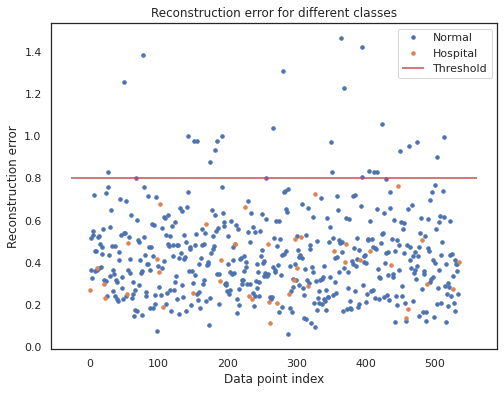

In [ ]:
test_x_predictions = autoencoder.predict(df_test_x_rescaled)
mse = np.mean(np.power(df_test_x_rescaled - test_x_predictions, 2), axis=1)
error_df_test = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': df_test['status']})
error_df_test = error_df_test.reset_index()
threshold_fixed = 0.8
groups = error_df_test.groupby('True_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Hospital" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [ ]:
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_class, pred_y)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
df_test.shape

(536, 22)

In [ ]:
## final data

In [ ]:
final_df = pd.read_csv('/content/final_dataset.csv',sep='\t')

In [ ]:
final_df.head()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3010457,cid_3013429,cid_3013869,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3011948,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3023091,cid_3010156,status
0,0,68,0,0,37.0,77.0,78.0,154.0,184.0,0.10,NaN,NaN,2.0,0.73,NaN,NaN,15.5,NaN,0.55,24.4,33.8,26.0,NaN,3.34,NaN,3.4,0
1,1,85,0,1,36.7,112.0,58.0,NaN,328.0,0.19,NaN,NaN,NaN,0.76,NaN,NaN,13.4,NaN,0.68,30.8,34.6,NaN,NaN,9.78,NaN,1.7,0
2,2,27,1,1,NaN,109.0,73.0,138.0,313.0,NaN,NaN,NaN,NaN,1.73,26.0,99.0,NaN,NaN,0.74,32.4,NaN,NaN,68.0,3.07,NaN,NaN,0
3,3,46,0,2,37.2,NaN,63.0,119.0,122.0,0.05,NaN,0.03,NaN,1.57,17.0,NaN,11.2,3.0,0.31,28.8,33.5,45.0,51.0,3.56,13.0,NaN,0
4,4,78,0,2,36.6,80.0,NaN,111.0,106.0,0.00,NaN,NaN,NaN,2.04,NaN,93.0,11.5,NaN,0.45,30.3,34.8,NaN,NaN,3.63,NaN,0.2,0


In [ ]:
final_df.shape

(1251, 27)

In [ ]:
final_df.columns

Index(['person_id', 'age', 'gender', 'race', 'cid_3020891', 'cid_3027018',
       'cid_3012888', 'cid_3004249', 'cid_3024929', 'cid_3028615',
       'cid_3010457', 'cid_3013429', 'cid_3013869', 'cid_3004327',
       'cid_3037511', 'cid_3023599', 'cid_3000963', 'cid_3011948',
       'cid_3033575', 'cid_3012030', 'cid_3009744', 'cid_3023314',
       'cid_3008342', 'cid_3013650', 'cid_3023091', 'cid_3010156', 'status'],
      dtype='object')

In [ ]:
final_df2 = final_df[['person_id', 'age', 'gender', 'race', 'cid_3020891', 'cid_3027018',
       'cid_3012888', 'cid_3004249', 'cid_3024929', 'cid_3028615',
       'cid_3013429', 'cid_3004327',
       'cid_3037511', 'cid_3023599', 'cid_3000963',
       'cid_3033575', 'cid_3012030', 'cid_3009744', 'cid_3023314',
       'cid_3008342', 'cid_3013650', 'cid_3010156', 'status']].copy()

In [ ]:
final_df2.shape

(1251, 23)

In [ ]:
development_features, test_features, development_labels, test_labels = train_test_split(final_df2.drop(['status'],axis=1),final_df2[['status']],test_size=0.2,stratify = final_df2[['status']], random_state=64)

In [ ]:
development_features.shape

(1000, 22)

In [ ]:
test_features.shape

(251, 22)

In [ ]:
development_features.head()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156
890,890,75,0,4,36.7,86.0,78.0,119.0,294.0,0.18,NaN,0.93,NaN,NaN,12.1,NaN,30.0,NaN,25.0,79.0,6.97,5.0
1036,1036,55,1,1,NaN,NaN,84.0,120.0,229.0,NaN,NaN,1.44,51.0,93.0,12.0,0.68,30.9,NaN,35.0,70.0,5.88,0.5
510,510,88,0,0,NaN,68.0,74.0,118.0,150.0,0.23,NaN,0.94,NaN,NaN,10.6,0.31,29.4,34.0,33.0,NaN,2.36,35.6
537,537,21,1,1,NaN,111.0,75.0,138.0,254.0,0.46,NaN,1.94,15.0,91.0,8.6,0.60,29.7,32.8,36.0,NaN,5.62,42.1
505,505,55,1,1,36.5,84.0,NaN,118.0,313.0,0.00,NaN,0.27,8.0,NaN,10.6,1.05,32.1,NaN,NaN,83.0,1.22,NaN


In [ ]:
my_imputer = kimputer 
df_full_train = pd.DataFrame(my_imputer.fit_transform(development_features),columns = development_features.columns.tolist())

In [ ]:
df_full_test = pd.DataFrame(my_imputer.fit_transform(test_features),columns = test_features.columns.tolist())

In [ ]:
df_full_train.head()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156
0,890.0,75.0,0.0,4.0,36.700000,86.000000,78.000000,119.0,294.0,0.180000,0.053333,0.93,26.333333,92.333333,12.1,0.55,30.0,33.100000,25.000000,79.000000,6.97,5.000000
1,1036.0,55.0,1.0,1.0,36.666667,85.666667,84.000000,120.0,229.0,0.093333,0.020000,1.44,51.000000,93.000000,12.0,0.68,30.9,33.933333,35.000000,70.000000,5.88,0.500000
2,510.0,88.0,0.0,0.0,37.233333,68.000000,74.000000,118.0,150.0,0.230000,0.040000,0.94,26.333333,93.000000,10.6,0.31,29.4,34.000000,33.000000,63.666667,2.36,35.600000
3,537.0,21.0,1.0,1.0,36.566667,111.000000,75.000000,138.0,254.0,0.460000,0.033333,1.94,15.000000,91.000000,8.6,0.60,29.7,32.800000,36.000000,73.666667,5.62,42.100000
4,505.0,55.0,1.0,1.0,36.500000,84.000000,81.333333,118.0,313.0,0.000000,0.010000,0.27,8.000000,93.000000,10.6,1.05,32.1,33.533333,40.333333,83.000000,1.22,9.433333


In [ ]:
development_labels = development_labels.reset_index(drop=True)

In [ ]:
test_labels = test_labels.reset_index(drop=True)

In [ ]:
df_train = pd.concat([df_full_train,development_labels],axis=1)

In [ ]:
df_valid = pd.concat([df_full_test,test_labels],axis=1)

In [ ]:
df_eval = pd.read_csv('/content/final_dataset_eval.csv',sep='\t')

In [ ]:
df_eval.head()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,status
0,0,31,1,1.0,37.3,NaN,70.0,NaN,323.0,0.00,NaN,1.85,33.0,84.0,13.5,0.14,28.7,35.4,38.0,68.0,5.93,1.1,1
1,1,41,1,1.0,NaN,65.0,64.0,95.0,223.0,0.03,NaN,0.84,5.0,NaN,12.5,0.63,31.2,30.6,29.0,61.0,8.83,NaN,0
2,2,74,0,2.0,36.7,NaN,NaN,130.0,253.0,0.08,NaN,0.19,NaN,NaN,15.2,0.45,31.8,31.3,30.0,85.0,10.27,NaN,0
3,3,6,1,2.0,36.8,74.0,NaN,NaN,NaN,NaN,NaN,1.55,NaN,87.0,9.4,0.41,30.3,32.8,NaN,39.0,1.87,NaN,0
4,4,67,1,2.0,NaN,NaN,82.0,101.0,191.0,0.00,NaN,0.16,17.0,87.0,11.2,1.01,27.9,31.1,38.0,47.0,8.00,2.6,0


In [ ]:
df_eval.shape

(536, 23)

In [ ]:
final_df2.head()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,status
0,0,68,0,0,37.0,77.0,78.0,154.0,184.0,0.10,NaN,0.73,NaN,NaN,15.5,0.55,24.4,33.8,26.0,NaN,3.34,3.4,0
1,1,85,0,1,36.7,112.0,58.0,NaN,328.0,0.19,NaN,0.76,NaN,NaN,13.4,0.68,30.8,34.6,NaN,NaN,9.78,1.7,0
2,2,27,1,1,NaN,109.0,73.0,138.0,313.0,NaN,NaN,1.73,26.0,99.0,NaN,0.74,32.4,NaN,NaN,68.0,3.07,NaN,0
3,3,46,0,2,37.2,NaN,63.0,119.0,122.0,0.05,0.03,1.57,17.0,NaN,11.2,0.31,28.8,33.5,45.0,51.0,3.56,NaN,0
4,4,78,0,2,36.6,80.0,NaN,111.0,106.0,0.00,NaN,2.04,NaN,93.0,11.5,0.45,30.3,34.8,NaN,NaN,3.63,0.2,0


In [ ]:
adf = pd.concat([final_df2,df_eval],axis=0)

In [ ]:
adf.shape

(1787, 23)

In [ ]:
adf.head()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,status
0,0,68,0,0.0,37.0,77.0,78.0,154.0,184.0,0.10,NaN,0.73,NaN,NaN,15.5,0.55,24.4,33.8,26.0,NaN,3.34,3.4,0
1,1,85,0,1.0,36.7,112.0,58.0,NaN,328.0,0.19,NaN,0.76,NaN,NaN,13.4,0.68,30.8,34.6,NaN,NaN,9.78,1.7,0
2,2,27,1,1.0,NaN,109.0,73.0,138.0,313.0,NaN,NaN,1.73,26.0,99.0,NaN,0.74,32.4,NaN,NaN,68.0,3.07,NaN,0
3,3,46,0,2.0,37.2,NaN,63.0,119.0,122.0,0.05,0.03,1.57,17.0,NaN,11.2,0.31,28.8,33.5,45.0,51.0,3.56,NaN,0
4,4,78,0,2.0,36.6,80.0,NaN,111.0,106.0,0.00,NaN,2.04,NaN,93.0,11.5,0.45,30.3,34.8,NaN,NaN,3.63,0.2,0


In [ ]:
bdf = adf.reset_index(drop=True)

In [ ]:
bdf.tail()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,status
1782,531,63,0,0.0,NaN,NaN,84.0,131.0,320.0,0.00,NaN,1.21,NaN,91.0,9.4,0.17,27.9,33.2,NaN,NaN,5.60,0.3,0
1783,532,6,0,3.0,36.8,63.0,NaN,133.0,285.0,NaN,NaN,0.33,25.0,90.0,NaN,0.42,31.4,32.4,NaN,46.0,2.26,1.1,0
1784,533,25,1,1.0,NaN,68.0,90.0,107.0,294.0,0.00,NaN,1.10,2.0,86.0,11.7,0.26,32.0,33.4,33.0,38.0,3.60,8.4,0
1785,534,15,0,4.0,37.0,90.0,50.0,141.0,173.0,0.06,0.02,0.04,30.0,NaN,6.9,0.38,29.6,33.6,33.0,81.0,2.33,NaN,0
1786,535,74,0,4.0,36.2,62.0,75.0,120.0,245.0,0.00,NaN,1.53,NaN,91.0,10.9,0.25,29.3,35.2,NaN,74.0,9.81,4.5,1


In [ ]:
my_imputer = kimputer

In [ ]:
df_b = pd.DataFrame(my_imputer.fit_transform(bdf),columns = bdf.columns.tolist())

In [ ]:
df_b.tail()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,status
1782,531.0,63.0,0.0,0.0,36.900000,69.666667,84.000000,131.0,320.0,0.000000,0.026667,1.21,25.0,91.000000,9.400000,0.17,27.9,33.2,37.000000,68.0,5.60,0.300000,0.0
1783,532.0,6.0,0.0,3.0,36.800000,63.000000,77.666667,133.0,285.0,0.176667,0.036667,0.33,25.0,90.000000,12.266667,0.42,31.4,32.4,39.666667,46.0,2.26,1.100000,0.0
1784,533.0,25.0,1.0,1.0,36.633333,68.000000,90.000000,107.0,294.0,0.000000,0.033333,1.10,2.0,86.000000,11.700000,0.26,32.0,33.4,33.000000,38.0,3.60,8.400000,0.0
1785,534.0,15.0,0.0,4.0,37.000000,90.000000,50.000000,141.0,173.0,0.060000,0.020000,0.04,30.0,86.666667,6.900000,0.38,29.6,33.6,33.000000,81.0,2.33,34.733333,0.0
1786,535.0,74.0,0.0,4.0,36.200000,62.000000,75.000000,120.0,245.0,0.000000,0.043333,1.53,17.0,91.000000,10.900000,0.25,29.3,35.2,38.666667,74.0,9.81,4.500000,1.0


In [ ]:
df_t1 = df_b[:1251].copy()

In [ ]:
df_t2 = df_b[1251:].reset_index(drop=True).copy()

In [ ]:
development_features, test_features, development_labels, test_labels = train_test_split(df_t1.drop(['status'],axis=1),df_t1[['status']],test_size=0.2,stratify = df_t1[['status']], random_state=64)

In [ ]:
df_train = pd.concat([development_features,development_labels],axis=1)

In [ ]:
df_train.shape

(1000, 23)

In [ ]:
df_valid = pd.concat([test_features,test_labels],axis=1)

In [ ]:
df_test.shape

(251, 23)

In [ ]:
df_eval = pd.DataFrame(my_imputer.fit_transform(df_eval),columns = df_eval.columns.tolist())

NameError: ignored

In [ ]:
df_t2.head()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,status
0,0.0,31.0,1.0,1.0,37.300000,88.666667,70.000000,145.000000,323.000000,0.000000,0.050000,1.85,33.000000,84.000000,13.5,0.14,28.7,35.4,38.000000,68.0,5.93,1.100000,1.0
1,1.0,41.0,1.0,1.0,36.766667,65.000000,64.000000,95.000000,223.000000,0.030000,0.023333,0.84,5.000000,90.333333,12.5,0.63,31.2,30.6,29.000000,61.0,8.83,11.666667,0.0
2,2.0,74.0,0.0,2.0,36.700000,88.333333,77.333333,130.000000,253.000000,0.080000,0.050000,0.19,15.000000,92.666667,15.2,0.45,31.8,31.3,30.000000,85.0,10.27,8.233333,0.0
3,3.0,6.0,1.0,2.0,36.800000,74.000000,73.333333,111.666667,341.333333,0.096667,0.060000,1.55,17.333333,87.000000,9.4,0.41,30.3,32.8,29.333333,39.0,1.87,35.133333,0.0
4,4.0,67.0,1.0,2.0,36.333333,79.666667,82.000000,101.000000,191.000000,0.000000,0.016667,0.16,17.000000,87.000000,11.2,1.01,27.9,31.1,38.000000,47.0,8.00,2.600000,0.0


In [ ]:
df_train.shape

(1000, 23)

In [ ]:
X_development_cont = df_t2[cont_f].copy().reset_index(drop=True)
columns = X_development_cont.columns.tolist()
X_development_cate_miss = df_t2.drop(columns,axis =1).reset_index(drop=True)
categorical_feature = X_development_cate_miss.columns.tolist()

In [ ]:
ss = StandardScaler()
development_features_ss = pd.DataFrame(ss.fit_transform(X_development_cont), columns =  X_development_cont.columns.tolist())

In [ ]:
development_features_ss.head()

,age,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156
0,1.155654,0.002311,0.416588,0.365805,-0.283390,0.997364,0.252685,-0.162047,-0.741175,0.138833,0.474684,0.163107,0.782476,0.117937,0.778946,-1.662916,1.412343,1.102768,-0.584497
1,0.383003,-0.107745,-0.034876,0.983777,-0.220586,0.191308,-1.047194,-0.162047,-0.064222,2.693624,0.604149,0.120263,0.588461,0.504945,0.535554,0.006567,0.634907,0.672796,-0.754455
2,1.657877,-0.437913,-1.107102,-0.046176,-0.346193,-0.788360,0.676559,0.151592,-0.727901,-0.836022,1.251475,-0.479553,-0.847252,-0.140068,0.839794,-0.327330,-1.611021,-0.715740,0.571218
3,-0.930503,0.662647,2.532825,0.056819,0.909874,0.501330,2.626379,-0.162047,0.599457,-0.936869,0.215754,-1.336434,0.278037,-0.011066,-0.255470,0.173515,0.951640,0.570233,0.816713
4,0.383003,-0.658025,0.247289,-0.320830,-0.346193,1.232981,-1.273260,-0.580233,-1.617231,-1.642798,-0.172642,-0.479553,2.024174,1.020955,-0.711830,0.173515,1.757871,-1.165437,-0.735571


In [ ]:
X_development_cate_miss.head()

,person_id,gender,race,status
0,890.0,0.0,4.0,0.0
1,1036.0,1.0,1.0,0.0
2,510.0,0.0,0.0,0.0
3,537.0,1.0,1.0,1.0
4,505.0,1.0,1.0,0.0


In [ ]:
df_eval2 = pd.concat([development_features_ss, X_development_cate_miss], axis=1)

In [ ]:
df_train2.shape

(1000, 23)

In [ ]:
df_valid2.shape

(251, 23)

In [ ]:
df_eval2.shape

(536, 23)

In [ ]:
df_train_0 = df_train2.loc[df_train2['status'] == 0]
df_train_1 = df_train2.loc[df_train2['status'] == 1]
df_train_0_x = df_train_0.drop(['status'], axis=1)
df_train_1_x = df_train_1.drop(['status'], axis=1)

df_valid_0 = df_valid2.loc[df_valid2['status'] == 0]
df_valid_1 = df_valid2.loc[df_valid2['status'] == 1]
df_valid_0_x = df_valid_0.drop(['status'], axis=1)
df_valid_1_x = df_valid_1.drop(['status'], axis=1)

df_test_0 = df_eval2.loc[df_eval2['status'] == 0]
df_test_1 = df_eval2.loc[df_eval2['status'] == 1]
df_test_0_x = df_test_0.drop(['status'], axis=1)
df_test_1_x = df_test_1.drop(['status'], axis=1)

In [ ]:
df_train_0_x_rescaled = df_train_0_x.copy()
df_valid_0_x_rescaled = df_valid_0_x.copy()
df_valid_x_rescaled = df_valid2.drop(['status'], axis = 1).copy()
df_test_0_x_rescaled = df_test_0_x.copy()
df_test_x_rescaled = df_eval2.drop(['status'], axis = 1).copy()

In [ ]:
df_train_0_x_rescaled.head()

,age,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,person_id,gender,race
0,1.155654,-0.041667,0.426249,0.390143,-0.299570,0.996024,0.211804,0.477868,-0.740631,0.178032,0.404401,0.163568,0.056370,0.097400,0.019945,-1.647743,1.393806,1.104967,-0.605112,890.0,0.0,4.0
1,0.383003,-0.151031,0.397972,1.004596,-0.237453,0.189564,-0.519137,-0.523952,-0.061576,2.677436,0.535148,0.120757,0.559906,0.485389,0.790627,-0.012969,0.608842,0.674660,-0.774903,1036.0,1.0,1.0
2,1.657877,1.708144,-1.100715,-0.019492,-0.361687,-0.790596,0.633501,0.077140,-0.727316,0.178032,0.535148,-0.478603,-0.873234,-0.161260,0.852282,-0.339924,0.056459,-0.714954,0.549470,510.0,0.0,0.0
4,0.383003,-0.697847,0.256587,0.731506,-0.361687,1.231759,-1.306305,-0.824497,-1.619407,-1.679634,0.535148,-0.478603,1.993045,1.002709,0.420700,0.858910,1.742679,-1.164999,-0.437836,505.0,1.0,1.0
5,-0.003322,-0.260394,2.207708,-1.965259,0.073132,0.201971,-0.491024,0.578050,-0.567539,-0.261053,0.077533,0.035134,0.908507,0.327320,-0.349982,0.967895,-1.077378,-0.162266,-0.725852,274.0,0.0,1.0


In [ ]:
del df_train_0_x_rescaled['person_id']

In [ ]:
del df_valid_0_x_rescaled['person_id']

In [ ]:
del df_valid_x_rescaled['person_id']

In [ ]:
del df_test_0_x_rescaled['person_id']

In [ ]:
del df_test_x_rescaled['person_id']

In [ ]:
nb_epoch = 200
batch_size = 16
input_dim = df_train_0_x_rescaled.shape[1] #num of predictor variables, 
encoding_dim = 32
hidden_dim = int(encoding_dim / 2)
learning_rate = 1e-3

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(encoding_dim, activation="relu")(decoder)
decoder = Dense(input_dim, activation="linear")(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
dense (Dense)                (None, 32)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 21)                693       
Total params: 2,741
Trainable params: 2,741
Non-trainable params: 0
___________________________________________________________

In [ ]:
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')
cp = ModelCheckpoint(filepath="autoencoder_classifier_v9.h5",
                               save_best_only=True,
                               verbose=0)
tb = TensorBoard(log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)
history = autoencoder.fit(df_train_0_x_rescaled, df_train_0_x_rescaled,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(df_valid_0_x_rescaled, df_valid_0_x_rescaled),
                    verbose=1,
                    callbacks=[cp, tb]).history

Epoch 1/200
58/58 [==============================] - 1s 9ms/step - loss: 1.0954 - accuracy: 0.1870 - val_loss: 0.9858 - val_accuracy: 0.3652
Epoch 2/200
58/58 [==============================] - 0s 2ms/step - loss: 0.9326 - accuracy: 0.3622 - val_loss: 0.8628 - val_accuracy: 0.3609
Epoch 3/200
58/58 [==============================] - 0s 3ms/step - loss: 0.8193 - accuracy: 0.3474 - val_loss: 0.7860 - val_accuracy: 0.3609
Epoch 4/200
58/58 [==============================] - 0s 2ms/step - loss: 0.7811 - accuracy: 0.3464 - val_loss: 0.7333 - val_accuracy: 0.3696
Epoch 5/200
58/58 [==============================] - 0s 3ms/step - loss: 0.6822 - accuracy: 0.3813 - val_loss: 0.6930 - val_accuracy: 0.3913
Epoch 6/200
58/58 [==============================] - 0s 2ms/step - loss: 0.6428 - accuracy: 0.3787 - val_loss: 0.6551 - val_accuracy: 0.3957
Epoch 7/200
58/58 [==============================] - 0s 2ms/step - loss: 0.6224 - accuracy: 0.4317 - val_loss: 0.6309 - val_accuracy: 0.4043
Epoch 8/200
5

In [ ]:
valid_x_predictions

array([[-0.75703126, -0.3793021 , -1.2630452 , ..., -0.2973649 ,
         0.56107306,  1.0600071 ],
       [-1.2536821 ,  1.1131808 , -0.7018635 , ..., -0.42688578,
         0.5953778 ,  1.2058465 ],
       [ 1.4056311 , -0.34942   ,  1.3925087 , ..., -0.4762887 ,
         0.40382928,  2.9806628 ],
       ...,
       [-1.1521653 ,  1.5378062 , -0.4542985 , ...,  1.3255668 ,
         0.60871625, -0.00646675],
       [ 0.19125701,  0.58186775, -0.2560706 , ..., -0.48495993,
         0.39391258,  3.9373972 ],
       [ 1.0376787 ,  0.29166514, -0.03959425, ..., -0.44949883,
         0.5152595 ,  2.0017936 ]], dtype=float32)

In [ ]:
valid_x_predictions = autoencoder.predict(df_valid_x_rescaled)
mse = np.mean(np.power(df_valid_x_rescaled - valid_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': df_valid2['status']})
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [ ]:
auc_precision_recall = auc(recall_rt, precision_rt)
print(auc_precision_recall)

0.07624949671768261


In [ ]:
auc_precision_recall

0.07624949671768261

In [ ]:
len(valid_x_predictions)

251

In [ ]:
valid_x_predictions[0]

array([-0.75703126, -0.3793021 , -1.2630452 ,  0.1281955 ,  0.16845846,
        0.9883183 , -0.25116917,  0.5028836 ,  0.8719161 , -1.4653217 ,
       -0.10579757, -0.77211684, -0.9371984 , -0.9142576 ,  0.42293924,
       -1.3595432 , -0.07842965, -0.08611548, -0.2973649 ,  0.56107306,
        1.0600071 ], dtype=float32)

In [ ]:
error_df_test.Reconstruction_error

0      0.194673
1      0.167679
2      0.056195
3      0.178801
4      0.112806
         ...   
531    0.054989
532    0.261342
533    0.060341
534    0.420073
535    0.241192
Name: Reconstruction_error, Length: 536, dtype: float64

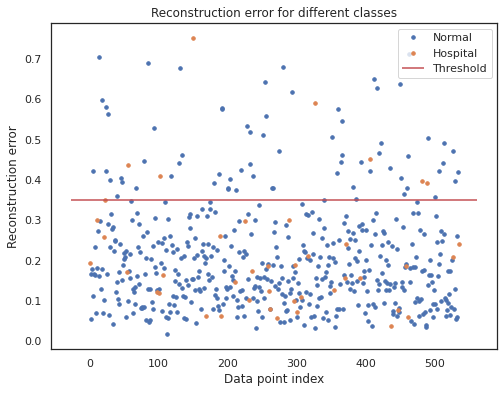

In [ ]:
test_x_predictions = autoencoder.predict(df_test_x_rescaled)
mse = np.mean(np.power(df_test_x_rescaled - test_x_predictions, 2), axis=1)
error_df_test = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': df_eval2['status']})
error_df_test = error_df_test.reset_index()
threshold_fixed = 0.35
groups = error_df_test.groupby('True_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Hospital" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [ ]:
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_class, pred_y)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
false_pos_rate, true_pos_rate, thresholds = roc_curve(error_df_test.True_class, error_df_test.Reconstruction_error)
roc_auc = auc(false_pos_rate, true_pos_rate,)
plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Building the Input Layer
input_layer = Input(shape =(X.shape[1], ))
# Building the Encoder network
encoded = Dense(100, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(25, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(12, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(6, activation ='relu')(encoded)
# Building the Decoder network
decoded = Dense(12, activation ='tanh')(encoded)
decoded = Dense(25, activation ='tanh')(decoded)
decoded = Dense(50, activation ='tanh')(decoded)
decoded = Dense(100, activation ='tanh')(decoded)
# Building the Output Layer
output_layer = Dense(X.shape[1], activation ='relu')(decoded)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/final_dataset_eval.csv',sep='\t')

In [ ]:
df2 = pd.read_csv('/content/zdevalresult.csv',sep='\t',header=None)

In [ ]:
my_imputer = kimputer 
df = pd.DataFrame(my_imputer.fit_transform(df),columns =df.columns.tolist())

In [ ]:
X_development_cont = df[cont_f].copy().reset_index(drop=True)
columns = X_development_cont.columns.tolist()
X_development_cate_miss = df.drop(columns,axis =1).reset_index(drop=True)
categorical_feature = X_development_cate_miss.columns.tolist()

In [ ]:
ss = StandardScaler()
development_features_ss = pd.DataFrame(ss.fit_transform(X_development_cont), columns =  X_development_cont.columns.tolist())

In [ ]:
final_df = pd.concat([development_features_ss,X_development_cate_miss],axis=1)

In [ ]:
final_df.shape

In [ ]:
final_df.head()

,age,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,person_id,gender,race,status
0,-0.534820,1.849979,-0.408552,-0.286056,-0.203039,1.185498,-1.153611,0.659320,0.544413,0.940129,-0.759815,0.992348,-1.343811,-0.307902,1.732670,0.609682,0.464669,0.758442,-0.564621,0.0,1.0,1.0,1.0
1,-0.159163,-0.812401,-1.325320,-0.901961,-1.602540,0.024470,-0.846203,-0.413898,-0.641326,-1.657660,-0.042921,0.524278,0.589357,0.942493,-1.638417,-0.935017,-0.080951,1.935476,-0.017964,1.0,1.0,1.0,0.0
2,1.080502,0.075059,0.161331,-0.594008,0.888097,0.372778,-0.333855,0.199369,-1.404426,0.259756,0.739145,1.788065,-0.120786,1.242588,-1.146800,-0.763383,1.789748,2.519934,-0.157143,2.0,0.0,2.0,0.0
3,-1.473960,0.370879,-0.656327,-0.765093,-0.179319,0.643685,-0.163072,0.199369,0.192213,-0.513396,-0.173266,-0.926736,-0.278596,0.492351,-0.093336,-0.877806,-1.795758,-0.889407,1.162547,3.0,1.0,2.0,0.0
4,0.817543,-0.615188,-1.350098,0.945753,-1.175574,-0.347059,-1.153611,-0.567215,-1.439646,-0.544322,-0.173266,-0.084212,2.088549,-0.708029,-1.287262,0.609682,-1.172192,1.598601,-0.489162,4.0,1.0,2.0,0.0


In [ ]:
df.head()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,status
0,0.0,31.0,1.0,1.0,37.300000,77.333333,70.000000,114.666667,323.000000,0.000000,0.050000,1.85,33.000000,84.000000,13.5,0.14,28.7,35.4,38.000000,68.0,5.93,1.100000,1.0
1,1.0,41.0,1.0,1.0,36.400000,65.000000,64.000000,95.000000,223.000000,0.030000,0.026667,0.84,5.000000,87.666667,12.5,0.63,31.2,30.6,29.000000,61.0,8.83,11.966667,0.0
2,2.0,74.0,0.0,2.0,36.700000,85.000000,67.000000,130.000000,253.000000,0.080000,0.040000,0.19,25.666667,91.666667,15.2,0.45,31.8,31.3,30.000000,85.0,10.27,9.200000,0.0
3,3.0,6.0,1.0,2.0,36.800000,74.000000,65.333333,115.000000,276.333333,0.096667,0.040000,1.55,17.333333,87.000000,9.4,0.41,30.3,32.8,29.333333,39.0,1.87,35.433333,0.0
4,4.0,67.0,1.0,2.0,36.466667,64.666667,82.000000,101.000000,191.000000,0.000000,0.023333,0.16,17.000000,87.000000,11.2,1.01,27.9,31.1,38.000000,47.0,8.00,2.600000,0.0


In [ ]:
df2.head()

,0.38201
0,0.38091
1,0.44103
2,0.26548
3,0.56712
4,0.42173


In [ ]:
df2.columns = ['a']

In [ ]:
df['score'] = df2.a.values.tolist()

In [ ]:
df['res'] = 0

In [ ]:
for i, r in df.iterrows():
  if r.score > 0.7:
    df.loc[i,'res'] = 1

In [ ]:
df.head(20)

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,status,score,res
0,0.0,31.0,1.0,1.0,37.300000,77.333333,70.000000,114.666667,323.000000,0.000000,0.050000,1.850000,33.000000,84.000000,13.5,0.140000,28.700000,35.400000,38.000000,68.000000,5.93,1.100000,1.0,0.38201,0
1,1.0,41.0,1.0,1.0,36.400000,65.000000,64.000000,95.000000,223.000000,0.030000,0.026667,0.840000,5.000000,87.666667,12.5,0.630000,31.200000,30.600000,29.000000,61.000000,8.83,11.966667,0.0,0.38091,0
2,2.0,74.0,0.0,2.0,36.700000,85.000000,67.000000,130.000000,253.000000,0.080000,0.040000,0.190000,25.666667,91.666667,15.2,0.450000,31.800000,31.300000,30.000000,85.000000,10.27,9.200000,0.0,0.44103,0
3,3.0,6.0,1.0,2.0,36.800000,74.000000,65.333333,115.000000,276.333333,0.096667,0.040000,1.550000,17.333333,87.000000,9.4,0.410000,30.300000,32.800000,29.333333,39.000000,1.87,35.433333,0.0,0.26548,0
4,4.0,67.0,1.0,2.0,36.466667,64.666667,82.000000,101.000000,191.000000,0.000000,0.023333,0.160000,17.000000,87.000000,11.2,1.010000,27.900000,31.100000,38.000000,47.000000,8.00,2.600000,0.0,0.56712,0
5,5.0,84.0,0.0,0.0,36.466667,115.000000,69.000000,103.000000,127.000000,0.050000,0.060000,0.590000,10.000000,93.000000,10.4,1.240000,30.800000,34.700000,37.000000,65.666667,3.68,0.500000,0.0,0.42173,0
6,6.0,75.0,0.0,2.0,36.700000,114.000000,72.666667,141.000000,195.000000,0.060000,0.050000,1.280000,18.000000,94.000000,14.0,0.403333,29.100000,32.400000,37.000000,67.000000,5.74,77.600000,0.0,0.51828,0
7,7.0,17.0,0.0,2.0,37.200000,85.333333,88.000000,108.000000,98.000000,0.090000,0.050000,0.100000,3.000000,90.333333,12.6,0.710000,32.100000,33.100000,31.000000,82.000000,3.68,3.500000,0.0,0.48087,0
8,8.0,5.0,0.0,2.0,36.700000,96.000000,65.333333,115.000000,177.000000,0.090000,0.060000,2.370000,12.000000,93.000000,15.8,0.930000,28.000000,32.900000,34.333333,57.000000,3.18,77.900000,0.0,0.50732,0
9,9.0,47.0,1.0,1.0,36.866667,57.000000,77.000000,129.000000,154.000000,0.163333,0.040000,2.020000,37.000000,89.333333,7.8,0.520000,27.200000,32.000000,39.000000,58.000000,10.67,2.400000,0.0,0.13100,0


In [ ]:
df.describe()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,status,score,res
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,267.500000,45.236940,0.492537,1.667910,36.674627,82.829602,72.786692,117.519900,220.892413,0.112581,0.035665,1.386275,22.866915,87.886194,11.379913,0.480616,29.315609,32.932898,34.447761,62.038557,4.061337,12.323756,0.078358,0.446956,0.067164
std,154.874142,26.644945,0.500411,1.141313,0.338359,13.465620,9.750869,14.065756,86.211015,0.097681,0.021762,0.852585,10.788465,5.119436,2.138432,0.253707,2.001235,1.425203,5.831822,12.841415,2.466121,19.896971,0.268985,0.164104,0.250540
min,0.000000,0.000000,0.000000,0.000000,35.400000,50.000000,50.000000,85.000000,12.000000,0.000000,0.000000,0.000000,0.000000,73.000000,6.600000,0.000000,23.000000,29.500000,22.000000,30.000000,0.000000,0.200000,0.000000,0.024651,0.000000
25%,133.750000,21.750000,0.000000,1.000000,36.500000,73.916667,66.250000,108.000000,168.000000,0.040000,0.020000,0.640000,15.000000,85.000000,9.800000,0.310000,28.100000,31.900000,30.000000,54.000000,2.320000,2.000000,0.000000,0.340068,0.000000
50%,267.500000,46.500000,0.000000,1.166667,36.666667,82.666667,73.000000,117.000000,217.000000,0.090000,0.033333,1.395000,22.166667,88.000000,11.600000,0.450000,29.483333,33.000000,34.666667,61.666667,3.555000,4.300000,0.000000,0.449775,0.000000
75%,401.250000,67.000000,1.000000,2.000000,36.866667,92.000000,80.000000,126.000000,275.250000,0.163333,0.050000,2.027500,29.000000,91.000000,13.100000,0.622500,30.708333,33.900000,39.000000,70.000000,5.262500,12.400000,0.000000,0.560450,0.000000
max,535.000000,90.000000,1.000000,4.000000,38.300000,116.000000,97.000000,155.000000,449.000000,0.500000,0.120000,3.440000,54.000000,102.000000,15.900000,1.320000,34.200000,36.100000,47.000000,96.000000,11.590000,110.900000,1.000000,0.871880,1.000000


In [ ]:
df[df.gender==0].shape

(272, 25)

In [ ]:
df[df.res==1].shape

(36, 25)

In [ ]:
df[df.status==1].shape

In [ ]:
df[df.res==1].describe()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,status,score,res
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.0
mean,286.972222,35.833333,0.388889,2.166667,36.673148,86.564815,75.509259,121.768519,201.768519,0.116389,0.032037,1.748148,21.796296,88.555556,10.820370,0.495185,29.700000,33.311111,34.148148,62.324074,3.929352,8.243519,0.194444,0.759345,1.0
std,171.775017,28.734748,0.494413,1.362770,0.318211,11.397248,9.299423,15.963216,105.278974,0.099584,0.021236,0.913808,9.683656,5.352940,2.155956,0.213936,1.924891,1.391493,5.302557,13.109184,2.880143,12.508341,0.401386,0.041493,0.0
min,10.000000,1.000000,0.000000,0.000000,36.000000,62.000000,50.000000,87.000000,36.000000,0.000000,0.000000,0.000000,3.000000,78.000000,6.900000,0.140000,24.000000,30.800000,25.000000,37.000000,0.250000,0.200000,0.000000,0.700150,1.0
25%,119.500000,11.750000,0.000000,1.000000,36.525000,79.500000,71.500000,114.000000,144.500000,0.040000,0.020000,1.267500,14.000000,86.000000,8.900000,0.360000,28.900000,32.158333,29.916667,57.500000,1.967500,1.700000,0.000000,0.725410,1.0
50%,318.500000,25.500000,0.000000,2.000000,36.666667,88.666667,75.833333,122.833333,201.500000,0.100000,0.033333,1.730000,22.500000,88.000000,11.300000,0.466667,29.583333,33.150000,33.500000,61.666667,2.745000,3.500000,0.000000,0.761850,1.0
75%,433.000000,62.250000,1.000000,3.250000,36.900000,94.000000,80.500000,131.083333,260.250000,0.170000,0.040000,2.202500,27.750000,91.500000,12.550000,0.587500,30.875000,34.350000,38.250000,68.500000,5.120000,8.050000,0.000000,0.784658,1.0
max,535.000000,90.000000,1.000000,4.000000,37.366667,112.000000,92.000000,155.000000,433.000000,0.400000,0.100000,3.440000,42.000000,102.000000,14.100000,1.050000,33.600000,36.100000,45.000000,93.000000,10.870000,61.400000,1.000000,0.871880,1.0


In [ ]:
df[df.res==0].describe()

,person_id,age,gender,race,cid_3020891,cid_3027018,cid_3012888,cid_3004249,cid_3024929,cid_3028615,cid_3013429,cid_3004327,cid_3037511,cid_3023599,cid_3000963,cid_3033575,cid_3012030,cid_3009744,cid_3023314,cid_3008342,cid_3013650,cid_3010156,status,score,res
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,266.098000,45.91400,0.500000,1.632000,36.674733,82.560667,72.590667,117.214000,222.269333,0.112307,0.035927,1.360220,22.944000,87.838000,11.420200,0.479567,29.287933,32.905667,34.469333,62.018000,4.070840,12.617533,0.070000,0.424464,0.0
std,153.679938,26.38976,0.500501,1.116723,0.340065,13.572557,9.762169,13.887025,84.633588,0.097638,0.021797,0.842998,10.868394,5.104408,2.133673,0.256484,2.005633,1.425087,5.872367,12.835058,2.436666,20.302439,0.255403,0.145620,0.0
min,0.000000,0.00000,0.000000,0.000000,35.400000,50.000000,50.000000,85.000000,12.000000,0.000000,0.000000,0.000000,0.000000,73.000000,6.600000,0.000000,23.000000,29.500000,22.000000,30.000000,0.000000,0.200000,0.000000,0.024651,0.0
25%,134.750000,23.00000,0.000000,1.000000,36.500000,73.000000,66.000000,107.916667,170.000000,0.040000,0.020000,0.612500,15.500000,85.000000,9.900000,0.308333,28.100000,31.900000,30.000000,53.916667,2.340000,2.000000,0.000000,0.326798,0.0
50%,264.500000,47.00000,0.500000,1.000000,36.666667,82.000000,72.500000,117.000000,220.000000,0.090000,0.035000,1.350000,22.166667,88.000000,11.600000,0.450000,29.433333,33.000000,34.666667,61.666667,3.590000,4.300000,0.000000,0.435935,0.0
75%,398.500000,67.00000,1.000000,2.000000,36.866667,91.416667,80.000000,126.000000,276.000000,0.160833,0.050000,2.020000,29.000000,91.000000,13.100000,0.630000,30.700000,33.900000,39.000000,70.000000,5.305000,12.400000,0.000000,0.536587,0.0
max,533.000000,90.00000,1.000000,4.000000,38.300000,116.000000,97.000000,155.000000,449.000000,0.500000,0.120000,3.440000,54.000000,102.000000,15.900000,1.320000,34.200000,35.900000,47.000000,96.000000,11.590000,110.900000,1.000000,0.698180,0.0
